###Problem statement
In the banking industry, detecting credit card fraud using machine learning is not just a trend; it is a necessity for the banks, as they need to put proactive monitoring and fraud prevention mechanisms in place. Machine learning helps these institutions reduce time-consuming manual reviews, costly chargebacks and fees, and denial of legitimate transactions.
As a part of the analytics team working on a fraud detection model and its cost-benefit analysis, need to develop a machine learning model to detect fraudulent transactions based on the historical transactional data of customers with a pool of merchants. 


The data set contains credit card transactions of around 1,000 cardholders with a pool of 800 merchants from 1 Jan 2019 to 31 Dec 2020. It contains a total of 18,52,394 transactions, out of which 9,651 are fraudulent transactions. The data set is highly imbalanced, with the positive class (frauds) accounting for 0.52% of the total transactions. Now, since the data set is highly imbalanced, it needs to be handled before model building. The feature 'amt' represents the transaction amount. The feature 'is_fraud' represents class labelling and takes the value 1 the transaction is a fraudulent transaction and 0, otherwise.

### Source
You can download the data set using this link.https://www.kaggle.com/kartik2112/fraud-detection

Initially Mounting the datasets to the collab notebook

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


Importing the Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Reading the datasets from the drive

In [ ]:
df_train = pd.read_csv("/content/gdrive/MyDrive/Capstone/fraudTrain.csv")
df_test = pd.read_csv("/content/gdrive/MyDrive/Capstone/fraudTest.csv")

In [ ]:
df_train.tail()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,state,zip,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
1296670,1296670,2020-06-21 12:12:08,30263540414123,fraud_Reichel Inc,entertainment,15.56,Erik,Patterson,M,162 Jessica Row Apt. 072,Hatch,UT,84735,37.7175,-112.4777,258,Geoscientist,1961-11-24,440b587732da4dc1a6395aba5fb41669,1371816728,36.841266,-111.690765,0
1296671,1296671,2020-06-21 12:12:19,6011149206456997,fraud_Abernathy and Sons,food_dining,51.70,Jeffrey,White,M,8617 Holmes Terrace Suite 651,Tuscarora,MD,21790,39.2667,-77.5101,100,"Production assistant, television",1979-12-11,278000d2e0d2277d1de2f890067dcc0a,1371816739,38.906881,-78.246528,0
1296672,1296672,2020-06-21 12:12:32,3514865930894695,fraud_Stiedemann Ltd,food_dining,105.93,Christopher,Castaneda,M,1632 Cohen Drive Suite 639,High Rolls Mountain Park,NM,88325,32.9396,-105.8189,899,Naval architect,1967-08-30,483f52fe67fabef353d552c1e662974c,1371816752,33.619513,-105.130529,0
1296673,1296673,2020-06-21 12:13:36,2720012583106919,"fraud_Reinger, Weissnat and Strosin",food_dining,74.90,Joseph,Murray,M,42933 Ryan Underpass,Manderson,SD,57756,43.3526,-102.5411,1126,Volunteer coordinator,1980-08-18,d667cdcbadaaed3da3f4020e83591c83,1371816816,42.788940,-103.241160,0
1296674,1296674,2020-06-21 12:13:37,4292902571056973207,"fraud_Langosh, Wintheiser and Hyatt",food_dining,4.30,Jeffrey,Smith,M,135 Joseph Mountains,Sula,MT,59871,45.8433,-113.8748,218,"Therapist, horticultural",1995-08-16,8f7c8e4ab7f25875d753b422917c98c9,1371816817,46.565983,-114.186110,0


In [ ]:
df_test.tail()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,state,zip,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
555714,555714,2020-12-31 23:59:07,30560609640617,fraud_Reilly and Sons,health_fitness,43.77,Michael,Olson,M,558 Michael Estates,Luray,MO,63453,40.4931,-91.8912,519,Town planner,1966-02-13,9b1f753c79894c9f4b71f04581835ada,1388534347,39.946837,-91.333331,0
555715,555715,2020-12-31 23:59:09,3556613125071656,fraud_Hoppe-Parisian,kids_pets,111.84,Jose,Vasquez,M,572 Davis Mountains,Lake Jackson,TX,77566,29.0393,-95.4401,28739,Futures trader,1999-12-27,2090647dac2c89a1d86c514c427f5b91,1388534349,29.661049,-96.186633,0
555716,555716,2020-12-31 23:59:15,6011724471098086,fraud_Rau-Robel,kids_pets,86.88,Ann,Lawson,F,144 Evans Islands Apt. 683,Burbank,WA,99323,46.1966,-118.9017,3684,Musician,1981-11-29,6c5b7c8add471975aa0fec023b2e8408,1388534355,46.658340,-119.715054,0
555717,555717,2020-12-31 23:59:24,4079773899158,fraud_Breitenberg LLC,travel,7.99,Eric,Preston,M,7020 Doyle Stream Apt. 951,Mesa,ID,83643,44.6255,-116.4493,129,Cartographer,1965-12-15,14392d723bb7737606b2700ac791b7aa,1388534364,44.470525,-117.080888,0
555718,555718,2020-12-31 23:59:34,4170689372027579,fraud_Dare-Marvin,entertainment,38.13,Samuel,Frey,M,830 Myers Plaza Apt. 384,Edmond,OK,73034,35.6665,-97.4798,116001,Media buyer,1993-05-10,1765bb45b3aa3224b4cdcb6e7a96cee3,1388534374,36.210097,-97.036372,0


concating the train and test datasets

In [ ]:
df = df_train.append(df_test,ignore_index = True)
df.tail()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,state,zip,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
1852389,555714,2020-12-31 23:59:07,30560609640617,fraud_Reilly and Sons,health_fitness,43.77,Michael,Olson,M,558 Michael Estates,Luray,MO,63453,40.4931,-91.8912,519,Town planner,1966-02-13,9b1f753c79894c9f4b71f04581835ada,1388534347,39.946837,-91.333331,0
1852390,555715,2020-12-31 23:59:09,3556613125071656,fraud_Hoppe-Parisian,kids_pets,111.84,Jose,Vasquez,M,572 Davis Mountains,Lake Jackson,TX,77566,29.0393,-95.4401,28739,Futures trader,1999-12-27,2090647dac2c89a1d86c514c427f5b91,1388534349,29.661049,-96.186633,0
1852391,555716,2020-12-31 23:59:15,6011724471098086,fraud_Rau-Robel,kids_pets,86.88,Ann,Lawson,F,144 Evans Islands Apt. 683,Burbank,WA,99323,46.1966,-118.9017,3684,Musician,1981-11-29,6c5b7c8add471975aa0fec023b2e8408,1388534355,46.658340,-119.715054,0
1852392,555717,2020-12-31 23:59:24,4079773899158,fraud_Breitenberg LLC,travel,7.99,Eric,Preston,M,7020 Doyle Stream Apt. 951,Mesa,ID,83643,44.6255,-116.4493,129,Cartographer,1965-12-15,14392d723bb7737606b2700ac791b7aa,1388534364,44.470525,-117.080888,0
1852393,555718,2020-12-31 23:59:34,4170689372027579,fraud_Dare-Marvin,entertainment,38.13,Samuel,Frey,M,830 Myers Plaza Apt. 384,Edmond,OK,73034,35.6665,-97.4798,116001,Media buyer,1993-05-10,1765bb45b3aa3224b4cdcb6e7a96cee3,1388534374,36.210097,-97.036372,0


In [ ]:
df.shape

(1852394, 23)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1852394 entries, 0 to 1852393
Data columns (total 23 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Unnamed: 0             int64  
 1   trans_date_trans_time  object 
 2   cc_num                 int64  
 3   merchant               object 
 4   category               object 
 5   amt                    float64
 6   first                  object 
 7   last                   object 
 8   gender                 object 
 9   street                 object 
 10  city                   object 
 11  state                  object 
 12  zip                    int64  
 13  lat                    float64
 14  long                   float64
 15  city_pop               int64  
 16  job                    object 
 17  dob                    object 
 18  trans_num              object 
 19  unix_time              int64  
 20  merch_lat              float64
 21  merch_long             float64
 22  is_fraud          

In [ ]:
df.isnull().sum()

Unnamed: 0               0
trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
dtype: int64

In both the above dataset, there are no null-values

Lets Drop the Unnamed:0 column from both the datasets, since it's not useful

In [ ]:
df.drop("Unnamed: 0",axis=1,inplace=True)
df.head()

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,state,zip,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,NC,28654,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,WA,99160,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,Malad City,ID,83252,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,Boulder,MT,59632,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,Doe Hill,VA,24433,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0


In [ ]:
df.shape

(1852394, 22)

### Inspecting data and Visulization on train dataset

In [ ]:
# converting the transaction date column into proper date and time foramt
df['trans_date_trans_time'] = pd.to_datetime(df['trans_date_trans_time'])

Copied the original dataset to perform univariate analysis(Didn't wanted to disturb original dataset)

In [ ]:
df_copy = df.copy()
df_copy

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,state,zip,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,NC,28654,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,WA,99160,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,Malad City,ID,83252,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,Boulder,MT,59632,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,Doe Hill,VA,24433,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1852389,2020-12-31 23:59:07,30560609640617,fraud_Reilly and Sons,health_fitness,43.77,Michael,Olson,M,558 Michael Estates,Luray,MO,63453,40.4931,-91.8912,519,Town planner,1966-02-13,9b1f753c79894c9f4b71f04581835ada,1388534347,39.946837,-91.333331,0
1852390,2020-12-31 23:59:09,3556613125071656,fraud_Hoppe-Parisian,kids_pets,111.84,Jose,Vasquez,M,572 Davis Mountains,Lake Jackson,TX,77566,29.0393,-95.4401,28739,Futures trader,1999-12-27,2090647dac2c89a1d86c514c427f5b91,1388534349,29.661049,-96.186633,0
1852391,2020-12-31 23:59:15,6011724471098086,fraud_Rau-Robel,kids_pets,86.88,Ann,Lawson,F,144 Evans Islands Apt. 683,Burbank,WA,99323,46.1966,-118.9017,3684,Musician,1981-11-29,6c5b7c8add471975aa0fec023b2e8408,1388534355,46.658340,-119.715054,0
1852392,2020-12-31 23:59:24,4079773899158,fraud_Breitenberg LLC,travel,7.99,Eric,Preston,M,7020 Doyle Stream Apt. 951,Mesa,ID,83643,44.6255,-116.4493,129,Cartographer,1965-12-15,14392d723bb7737606b2700ac791b7aa,1388534364,44.470525,-117.080888,0


Feature Engineering

In [ ]:
df_copy["day_of_week"]= df_copy['trans_date_trans_time'].dt.day_name()
df_copy["day_of_week"].head()

0    Tuesday
1    Tuesday
2    Tuesday
3    Tuesday
4    Tuesday
Name: day_of_week, dtype: object

In [ ]:
#extracting the month and year from the "Transaction date column"
df_copy["month"] = df_copy['trans_date_trans_time'].dt.to_period('M')
df_copy["month"].head()

0    2019-01
1    2019-01
2    2019-01
3    2019-01
4    2019-01
Name: month, dtype: period[M]

In [ ]:
df_copy["hour"] = df_copy["trans_date_trans_time"].dt.to_period("H")
df_copy["hour"].head()

0    2019-01-01 00:00
1    2019-01-01 00:00
2    2019-01-01 00:00
3    2019-01-01 00:00
4    2019-01-01 00:00
Name: hour, dtype: period[H]

Visualization

In [ ]:
# Define a function to visualize all cat_cols vs converted variable
# also visualize the percentage of is_fraud
def uni_cat(X):
    cat_per= df_copy[[X, 'is_fraud']].groupby([X],as_index=False).mean()
    cat_per["is_fraud"] = cat_per["is_fraud"]*100
    cat_per.sort_values(by='is_fraud', ascending=False, inplace=True)
    
    fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(15,6))
    s = sns.countplot(ax=ax1, x = X, data=df_copy, hue ="is_fraud",order=cat_per[X])
    ax1.set_title(X, fontdict={'fontsize':15,'fontweight':5,'color' :'Blue'})
    s.set_xticklabels(s.get_xticklabels(),rotation=90)
    ax1.legend(['not_fraud','is_fraud'])
    plt.ylabel("count",fontsize=15)
    plt.xlabel(X,fontsize=15)
    
    
    s = sns.barplot(ax=ax2, x = X, y='is_fraud', data=cat_per,order=cat_per[X])
    ax2.set_title(X+"( is_fraud % )",fontdict={"fontsize":15,"fontweight":5,"color":"Blue"})
    s.set_xticklabels(s.get_xticklabels(),rotation=90)
    plt.ylabel('Percent of is_fraud [%]', fontsize=15)
    plt.xlabel(X,fontsize=15)

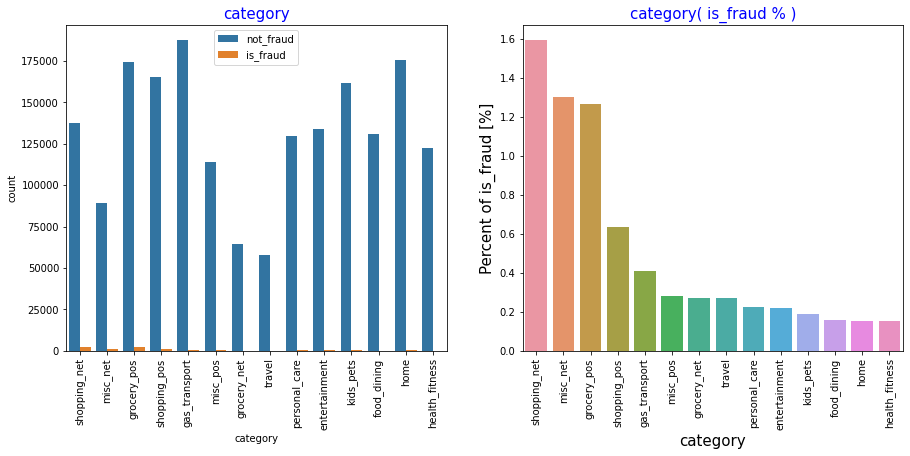

In [ ]:
uni_cat("category")

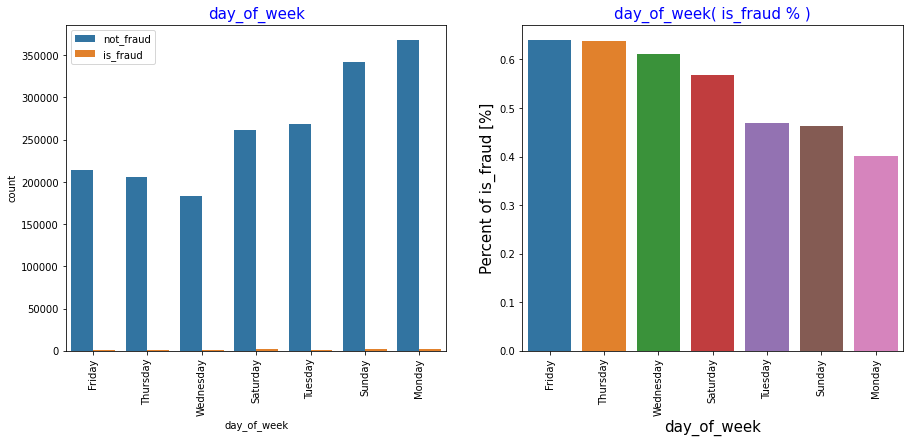

In [ ]:
uni_cat("day_of_week")

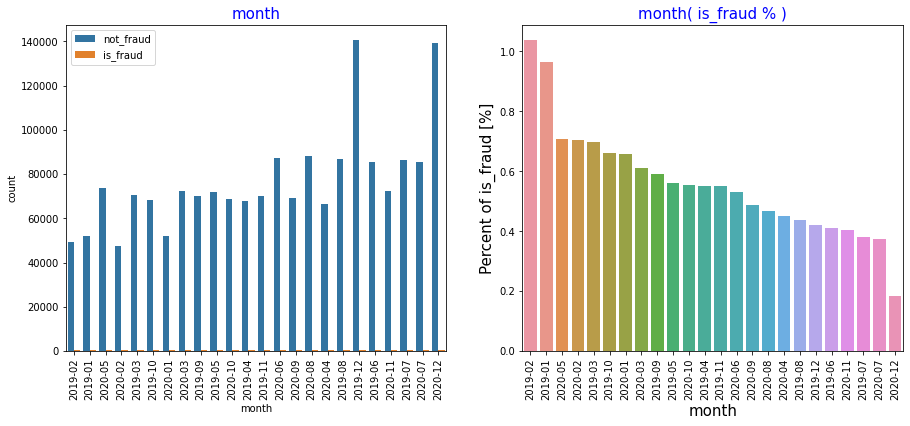

In [ ]:
uni_cat("month")

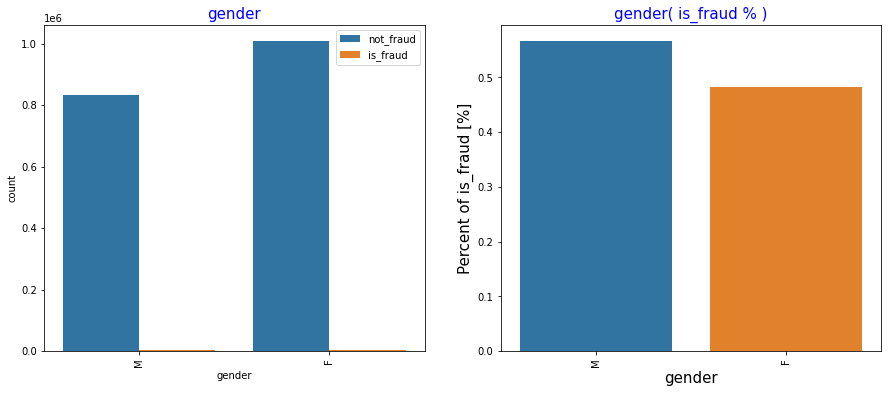

In [ ]:
uni_cat("gender")

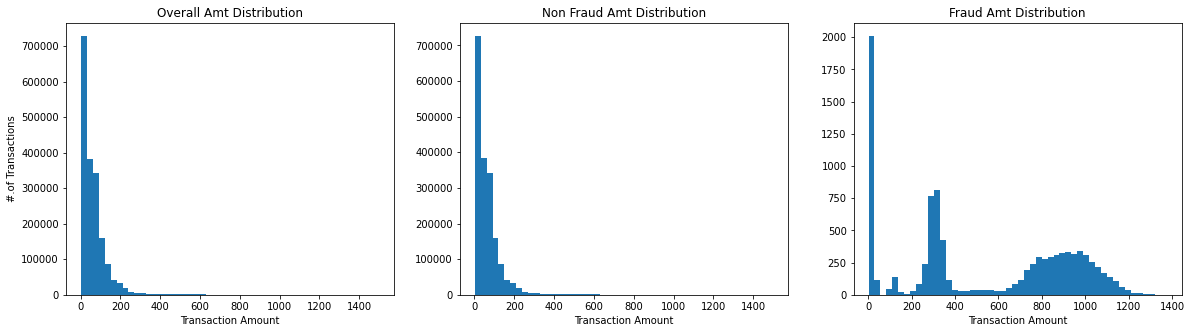

In [ ]:
# Plotting the graphs amt distribution less than 1500 based on fraud
fig, ax = plt.subplots(1,3,figsize=(20,5))
ax[0].hist(df_copy[df_copy['amt']<=1500]['amt'], bins=50)
ax[1].hist(df_copy[(df_copy['is_fraud']==0) & (df_copy['amt']<=1500)]['amt'], bins=50)
ax[2].hist(df_copy[(df_copy['is_fraud']==1) & (df_copy['amt']<=1500)]['amt'], bins=50)

ax[0].set_title('Overall Amt Distribution')
ax[1].set_title('Non Fraud Amt Distribution')
ax[2].set_title('Fraud Amt Distribution')

ax[0].set_xlabel('Transaction Amount')
ax[0].set_ylabel('#.of Transactions')

ax[1].set_xlabel('Transaction Amount')
ax[2].set_xlabel('Transaction Amount')
plt.show()

#### checking outliers for 'amt' column

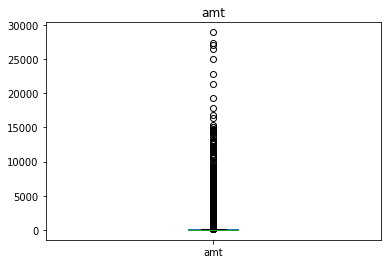

In [ ]:
# Plotting a box plot to check the outliers in amt column
df_copy["amt"].plot.box()
plt.title("amt")
plt.show()

Time Line Plots

Year Month vs Number of Transactions\
Non-fraud transactions

In [ ]:
timeline1 = df_copy.groupby(df_copy["month"])[['trans_num','cc_num']].nunique().reset_index()
timeline1.columns = ['year_month','num_of_transactions','customers']
timeline1

,year_month,num_of_transactions,customers
0,2019-01,52525,913
1,2019-02,49866,918
2,2019-03,70939,916
3,2019-04,68078,913
4,2019-05,72532,910
5,2019-06,86064,908
6,2019-07,86596,910
7,2019-08,87359,911
8,2019-09,70652,913
9,2019-10,68758,912


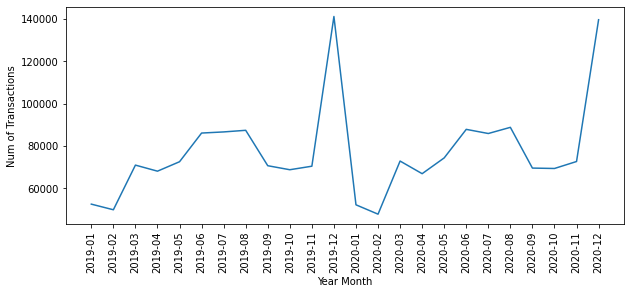

In [ ]:
x = np.arange(0,len(timeline1),1)
fig, ax = plt.subplots(1,1,figsize=(10,4))
ax.plot(x,timeline1['num_of_transactions'])
ax.set_xticks(x)
ax.set_xticklabels(timeline1['year_month'], rotation = 'vertical')

ax.set_xlabel('Year Month')
ax.set_ylabel('Num of Transactions')
plt.show()

Year Month vs Number of Customers 

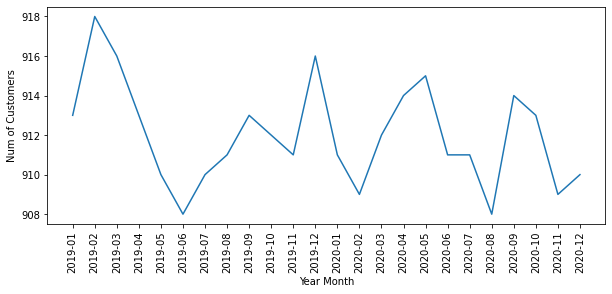

In [ ]:
fig, ax = plt.subplots(1,1,figsize=(10,4))
ax.plot(x,timeline1['customers'])
ax.set_xticks(x)
ax.set_xticklabels(timeline1['year_month'],rotation='vertical')

ax.set_xlabel('Year Month')
ax.set_ylabel('Num of Customers')
plt.show()

In [ ]:
month = df_copy['trans_date_trans_time'].dt.to_period('M')
month.head()

0    2019-01
1    2019-01
2    2019-01
3    2019-01
4    2019-01
Name: trans_date_trans_time, dtype: period[M]

### Fraud Transactions

Time line plots on for fraud transactions

In [ ]:
fraud_trans = df_copy[df_copy["is_fraud"] == 1]
timeline2 = fraud_trans.groupby("month")[['trans_num','cc_num']].nunique().reset_index()
timeline2.columns = ['year_month','num_of_transactions','customers']
timeline2

,year_month,num_of_transactions,customers
0,2019-01,506,50
1,2019-02,517,53
2,2019-03,494,49
3,2019-04,376,41
4,2019-05,408,42
5,2019-06,354,35
6,2019-07,331,36
7,2019-08,382,39
8,2019-09,418,44
9,2019-10,454,50


Year Month Vs No of Transactions

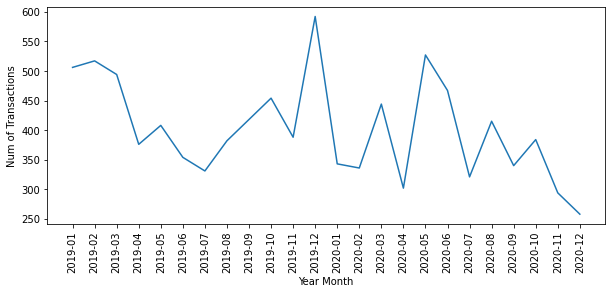

In [ ]:
x = np.arange(0,len(timeline2),1)
fig, ax = plt.subplots(1,1,figsize=(10,4))
ax.plot(x,timeline2['num_of_transactions'])
ax.set_xticks(x)
ax.set_xticklabels(timeline2['year_month'],rotation='vertical')

ax.set_xlabel('Year Month')
ax.set_ylabel('Num of Transactions')
plt.show()

Year Month Vs No of Customers

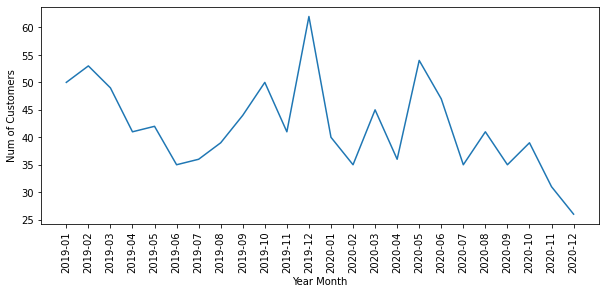

In [ ]:
fig, ax = plt.subplots(1,1,figsize=(10,4))
ax.plot(x,timeline2['customers'])
ax.set_xticks(x)
ax.set_xticklabels(timeline2['year_month'],rotation='vertical')

ax.set_xlabel('Year Month')
ax.set_ylabel('Num of Customers')
plt.show()

Percentage Fraud for category column

In [ ]:
df_category = df[['category','trans_num']].groupby(['category']).count().reset_index()
df_category.columns = ['Category','category_count']
df_category['percent'] = (df_category['category_count']/df_category['category_count'].sum())*100
df_category = df_category.sort_values(by = ['percent'], ascending=False).reset_index()
df_category

,index,Category,category_count,percent
0,2,gas_transport,188029,10.150594
1,4,grocery_pos,176191,9.511529
2,6,home,175460,9.472067
3,12,shopping_pos,166463,8.986371
4,7,kids_pets,161727,8.730702
5,11,shopping_net,139322,7.521186
6,0,entertainment,134118,7.240252
7,1,food_dining,130729,7.057300
8,10,personal_care,130085,7.022534
9,5,health_fitness,122553,6.615925


In [ ]:
# Merging the two category dataframes
df_fraud_category = df[['category','is_fraud','trans_num']].groupby(['category','is_fraud']).count().reset_index()
df_fraud_category.columns = ['Category','is_fraud','count']

df_fraud_category = df_fraud_category.merge(df_category[['Category','category_count','percent']],how='inner',\
                                  left_on='Category',right_on='Category')


df_fraud_category['percent_grp'] = (df_fraud_category['count']/df_fraud_category['category_count'])*100

In [ ]:
# sorting the fraud category
df_fraud=df_fraud_category[df_fraud_category['is_fraud'] == 1].sort_values(by = ['percent_grp'])
df_fraud

,Category,is_fraud,count,category_count,percent,percent_grp
11,health_fitness,1,185,122553,6.615925,0.150955
13,home,1,265,175460,9.472067,0.151032
3,food_dining,1,205,130729,7.057300,0.156813
15,kids_pets,1,304,161727,8.730702,0.187971
1,entertainment,1,292,134118,7.240252,0.217719
21,personal_care,1,290,130085,7.022534,0.222931
27,travel,1,156,57956,3.128708,0.269170
7,grocery_net,1,175,64878,3.502387,0.269737
19,misc_pos,1,322,114229,6.166561,0.281890
5,gas_transport,1,772,188029,10.150594,0.410575


Shopping_net, misc_net and grocery_pos turns out to be highest fraud categories

Let's check transaction details for "merchant" column

In [ ]:
df_merchant = df[['merchant','trans_num']].groupby(['merchant']).count().reset_index()
df_merchant.columns = ['Merchant','merchant_count']

df_merchant['percent'] = (df_merchant['merchant_count']/df_merchant['merchant_count'].sum())*100

df_merchant.sort_values(by = ['percent'], ascending=False)

,Merchant,merchant_count,percent
316,fraud_Kilback LLC,6262,0.338049
105,fraud_Cormier LLC,5246,0.283201
571,fraud_Schumm PLC,5195,0.280448
349,fraud_Kuhn LLC,5031,0.271594
70,fraud_Boyer PLC,4999,0.269867
...,...,...,...
143,"fraud_Douglas, DuBuque and McKenzie",1101,0.059437
633,fraud_Treutel-King,1098,0.059275
544,fraud_Satterfield-Lowe,1095,0.059113
221,"fraud_Hahn, Douglas and Schowalter",1091,0.058897


In [ ]:
#  merging the two data frames of the merchant transactions
df_fraud_merchant = df[['merchant','is_fraud','trans_num']].groupby(['merchant','is_fraud']).count().reset_index()
df_fraud_merchant.columns = ['Merchant','is_fraud','count']

df_fraud_merchant = df_fraud_merchant.merge(df_merchant[['Merchant','merchant_count','percent']],how='inner',left_on='Merchant',right_on='Merchant')


df_fraud_merchant['percent_grp'] = (df_fraud_merchant['count']/df_fraud_merchant['merchant_count'])*100

In [ ]:
# checking out the fraud count encountered by a customer
# sorting by highest fraud count
df_fraud_merchant[df_fraud_merchant['is_fraud'] == 1].sort_values(by = ['percent_grp'],ascending=False).head(10)

,Merchant,is_fraud,count,merchant_count,percent,percent_grp
673,fraud_Kozey-Boehm,1,60,2758,0.148888,2.175489
490,"fraud_Herman, Treutel and Dickens",1,38,1870,0.100950,2.032086
1226,fraud_Terry-Huel,1,56,2864,0.154611,1.955307
607,fraud_Kerluke-Abshire,1,50,2635,0.142248,1.897533
884,"fraud_Mosciski, Ziemann and Farrell",1,53,2821,0.152289,1.878766
1105,"fraud_Schmeler, Bashirian and Price",1,52,2788,0.150508,1.865136
691,fraud_Kuhic LLC,1,53,2842,0.153423,1.864884
563,fraud_Jast Ltd,1,51,2757,0.148834,1.849837
743,"fraud_Langworth, Boehm and Gulgowski",1,52,2817,0.152073,1.845935
1051,"fraud_Romaguera, Cruickshank and Greenholt",1,51,2767,0.149374,1.843151


Converting the "trans_date_trans_time" column and "dob" columsto proper Date time format

In [ ]:
df["trans_date_trans_time"] = pd.to_datetime(df["trans_date_trans_time"])
df["trans_date"] = df["trans_date_trans_time"].dt.strftime("%Y-%m-%d")
df["trans_date"] = pd.to_datetime(df["trans_date"])
df["dob"] = pd.to_datetime(df["dob"])

### Data Preparation

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1852394 entries, 0 to 1852393
Data columns (total 23 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   trans_date_trans_time  datetime64[ns]
 1   cc_num                 int64         
 2   merchant               object        
 3   category               object        
 4   amt                    float64       
 5   first                  object        
 6   last                   object        
 7   gender                 object        
 8   street                 object        
 9   city                   object        
 10  state                  object        
 11  zip                    int64         
 12  lat                    float64       
 13  long                   float64       
 14  city_pop               int64         
 15  job                    object        
 16  dob                    datetime64[ns]
 17  trans_num              object        
 18  unix_time             

Dropping columns which are not useful for model building

In [ ]:
drop_cols = ["cc_num","first","last","street","zip","trans_num","unix_time"]
df_1 = df.drop(drop_cols,axis = 1)

In [ ]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1852394 entries, 0 to 1852393
Data columns (total 16 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   trans_date_trans_time  datetime64[ns]
 1   merchant               object        
 2   category               object        
 3   amt                    float64       
 4   gender                 object        
 5   city                   object        
 6   state                  object        
 7   lat                    float64       
 8   long                   float64       
 9   city_pop               int64         
 10  job                    object        
 11  dob                    datetime64[ns]
 12  merch_lat              float64       
 13  merch_long             float64       
 14  is_fraud               int64         
 15  trans_date             datetime64[ns]
dtypes: datetime64[ns](3), float64(5), int64(2), object(6)
memory usage: 226.1+ MB


### Class Imbalance

In [ ]:
# the percentage of fraud and not_fraud present in train data
classs = df["is_fraud"].value_counts()
non_fraud_share = (classs[0]/df["is_fraud"].count())*100
fraud_share = (classs[1]/df["is_fraud"].count())*100

print("Non- Fraud Share train :", non_fraud_share)
print("Fraud Share train :", fraud_share)

Non- Fraud Share train : 99.47899852839083
Fraud Share train : 0.5210014716091717


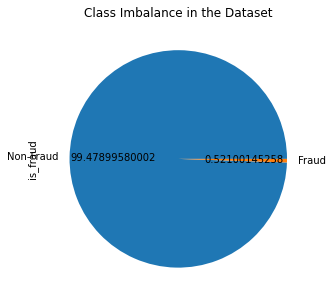

In [ ]:
# pie chart to see imbalance of the dataset
plt.figure(figsize=[10,5])
plt.title("Class Imbalance in the Dataset")
df["is_fraud"].value_counts().plot(kind='pie',autopct='%1.11f',labels=['Non-Fraud','Fraud'])
plt.show()

Creating column for age at transaction date

In [ ]:
df_1['age_at_trans'] = df_1['trans_date'] - df_1['dob']
df_1['age_at_trans'] = df_1['age_at_trans'].astype('timedelta64[Y]')

In [ ]:
df_1.head()

,trans_date_trans_time,merchant,category,amt,gender,city,state,lat,long,city_pop,job,dob,merch_lat,merch_long,is_fraud,trans_date,age_at_trans
0,2019-01-01 00:00:18,"fraud_Rippin, Kub and Mann",misc_net,4.97,F,Moravian Falls,NC,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,36.011293,-82.048315,0,2019-01-01,30.0
1,2019-01-01 00:00:44,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,F,Orient,WA,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,49.159047,-118.186462,0,2019-01-01,40.0
2,2019-01-01 00:00:51,fraud_Lind-Buckridge,entertainment,220.11,M,Malad City,ID,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,43.150704,-112.154481,0,2019-01-01,56.0
3,2019-01-01 00:01:16,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,M,Boulder,MT,46.2306,-112.1138,1939,Patent attorney,1967-01-12,47.034331,-112.561071,0,2019-01-01,51.0
4,2019-01-01 00:03:06,fraud_Keeling-Crist,misc_pos,41.96,M,Doe Hill,VA,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,38.674999,-78.632459,0,2019-01-01,32.0


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


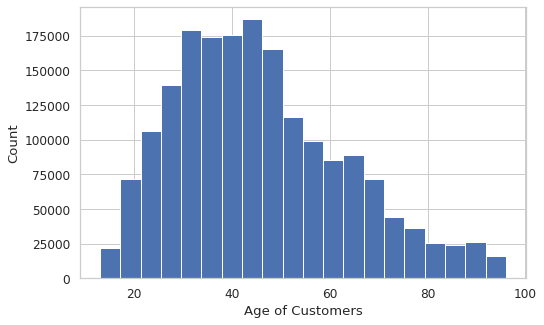

In [ ]:
sns.set(style='whitegrid', palette="deep", font_scale=1.1, rc={"figure.figsize": [8, 5]})
sns.distplot(df_1['age_at_trans'], norm_hist=False, kde=False, bins=20, hist_kws={"alpha": 1}).set(xlabel='Age of Customers', ylabel='Count');

from the above chart, the distribution of age of the customers is dense in betweeen 30-70

In [ ]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1852394 entries, 0 to 1852393
Data columns (total 17 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   trans_date_trans_time  datetime64[ns]
 1   merchant               object        
 2   category               object        
 3   amt                    float64       
 4   gender                 object        
 5   city                   object        
 6   state                  object        
 7   lat                    float64       
 8   long                   float64       
 9   city_pop               int64         
 10  job                    object        
 11  dob                    datetime64[ns]
 12  merch_lat              float64       
 13  merch_long             float64       
 14  is_fraud               int64         
 15  trans_date             datetime64[ns]
 16  age_at_trans           float64       
dtypes: datetime64[ns](3), float64(6), int64(2), object(6)
memory usag

Let's find the fraud city, state and jobs involved

In [ ]:
fraud_city = pd.DataFrame(df_1.groupby('city')['is_fraud'].sum())

In [ ]:
fraud_city = fraud_city[fraud_city['is_fraud']>0]
fraud_city.index

Index(['Achille', 'Acworth', 'Adams', 'Afton', 'Akron', 'Albany',
       'Albuquerque', 'Alder', 'Aledo', 'Alexandria',
       ...
       'Winger', 'Winnsboro', 'Winslow', 'Winter', 'Winthrop', 'Wittenberg',
       'Woodville', 'Yellowstone National Park', 'Zaleski', 'Zavalla'],
      dtype='object', name='city', length=887)

In [ ]:
fraud_state = pd.DataFrame(df_1.groupby('state')['is_fraud'].sum())
fraud_state = fraud_state[fraud_state['is_fraud']>0]
fraud_state.index

Index(['AK', 'AL', 'AR', 'AZ', 'CA', 'CO', 'CT', 'DC', 'DE', 'FL', 'GA', 'HI',
       'IA', 'ID', 'IL', 'IN', 'KS', 'KY', 'LA', 'MA', 'MD', 'ME', 'MI', 'MN',
       'MO', 'MS', 'MT', 'NC', 'ND', 'NE', 'NH', 'NJ', 'NM', 'NV', 'NY', 'OH',
       'OK', 'OR', 'PA', 'RI', 'SC', 'SD', 'TN', 'TX', 'UT', 'VA', 'VT', 'WA',
       'WI', 'WV', 'WY'],
      dtype='object', name='state')

In [ ]:
fraud_job = pd.DataFrame(df_1.groupby('job')['is_fraud'].sum())
fraud_job = fraud_job[fraud_job['is_fraud']>0]
fraud_job.index

Index(['Academic librarian', 'Accountant, chartered',
       'Accountant, chartered certified',
       'Accountant, chartered public finance', 'Accounting technician',
       'Acupuncturist', 'Administrator', 'Administrator, arts',
       'Administrator, charities/voluntary organisations',
       'Administrator, education',
       ...
       'Visual merchandiser', 'Volunteer coordinator', 'Warden/ranger',
       'Warehouse manager', 'Waste management officer', 'Water engineer',
       'Water quality scientist', 'Web designer', 'Wellsite geologist',
       'Writer'],
      dtype='object', name='job', length=494)

Finding distance from customer location to merchant location in degrees latitude and degrees longitude

In [ ]:
# For the dataset
df_1['lat_dist'] = abs(round(df_1['merch_lat'] - df_1['lat'],3))
df_1['long_dist'] = abs(round(df_1['merch_long'] - df_1['long'],3))

In [ ]:
df_1[['merch_lat','lat','lat_dist','merch_long','long','long_dist']].head()

,merch_lat,lat,lat_dist,merch_long,long,long_dist
0,36.011293,36.0788,0.068,-82.048315,-81.1781,0.870
1,49.159047,48.8878,0.271,-118.186462,-118.2105,0.024
2,43.150704,42.1808,0.970,-112.154481,-112.2620,0.108
3,47.034331,46.2306,0.804,-112.561071,-112.1138,0.447
4,38.674999,38.4207,0.254,-78.632459,-79.4629,0.830


Extracting transaction month from "trans_date" column

In [ ]:
df_1['trans_month'] = pd.DatetimeIndex(df_1['trans_date']).month

In [ ]:
df_1[["trans_date","trans_month"]].head()

,trans_date,trans_month
0,2019-01-01,1
1,2019-01-01,1
2,2019-01-01,1
3,2019-01-01,1
4,2019-01-01,1


Lets check the number of unique values in each column of both the datasets

In [ ]:
df_1.nunique()

trans_date_trans_time    1819551
merchant                     693
category                      14
amt                        60616
gender                         2
city                         906
state                         51
lat                          983
long                         983
city_pop                     891
job                          497
dob                          984
merch_lat                1754157
merch_long               1809753
is_fraud                       2
trans_date                   730
age_at_trans                  84
lat_dist                    1001
long_dist                   1001
trans_month                   12
dtype: int64

In [ ]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1852394 entries, 0 to 1852393
Data columns (total 20 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   trans_date_trans_time  datetime64[ns]
 1   merchant               object        
 2   category               object        
 3   amt                    float64       
 4   gender                 object        
 5   city                   object        
 6   state                  object        
 7   lat                    float64       
 8   long                   float64       
 9   city_pop               int64         
 10  job                    object        
 11  dob                    datetime64[ns]
 12  merch_lat              float64       
 13  merch_long             float64       
 14  is_fraud               int64         
 15  trans_date             datetime64[ns]
 16  age_at_trans           float64       
 17  lat_dist               float64       
 18  long_dist             

In [ ]:
# Dropping variables not useful for model building

drop_cols = ['trans_date_trans_time','city','lat','long','job','dob','merch_lat','merch_long','trans_date','merchant','state']

df_2 = df_1.drop(drop_cols,axis=1)

In [ ]:
df_2.head()

,category,amt,gender,city_pop,is_fraud,age_at_trans,lat_dist,long_dist,trans_month
0,misc_net,4.97,F,3495,0,30.0,0.068,0.870,1
1,grocery_pos,107.23,F,149,0,40.0,0.271,0.024,1
2,entertainment,220.11,M,4154,0,56.0,0.970,0.108,1
3,gas_transport,45.00,M,1939,0,51.0,0.804,0.447,1
4,misc_pos,41.96,M,99,0,32.0,0.254,0.830,1


Now, Mapping Gender column

In [ ]:
df_2["gender"] = df_2["gender"].map({"M":1,"F":0})

In [ ]:
df_2.head()

,category,amt,gender,city_pop,is_fraud,age_at_trans,lat_dist,long_dist,trans_month
0,misc_net,4.97,0,3495,0,30.0,0.068,0.870,1
1,grocery_pos,107.23,0,149,0,40.0,0.271,0.024,1
2,entertainment,220.11,1,4154,0,56.0,0.970,0.108,1
3,gas_transport,45.00,1,1939,0,51.0,0.804,0.447,1
4,misc_pos,41.96,1,99,0,32.0,0.254,0.830,1


In [ ]:
# describe the data
df_2[['amt','city_pop','age_at_trans','lat_dist','long_dist']].describe(percentiles=[.25, .5, .75, .90, .95, .99])


,amt,city_pop,age_at_trans,lat_dist,long_dist
count,1.852394e+06,1.852394e+06,1.852394e+06,1.852394e+06,1.852394e+06
mean,7.006357e+01,8.864367e+04,4.576447e+01,5.002690e-01,5.002850e-01
std,1.592540e+02,3.014876e+05,1.741280e+01,2.885700e-01,2.888276e-01
min,1.000000e+00,2.300000e+01,1.300000e+01,0.000000e+00,0.000000e+00
25%,9.640000e+00,7.410000e+02,3.200000e+01,2.500000e-01,2.500000e-01
50%,4.745000e+01,2.443000e+03,4.400000e+01,5.010000e-01,5.000000e-01
75%,8.310000e+01,2.032800e+04,5.700000e+01,7.500000e-01,7.500000e-01
90%,1.363300e+02,1.861400e+05,7.000000e+01,9.000000e-01,9.000000e-01
95%,1.953400e+02,5.257130e+05,7.900000e+01,9.500000e-01,9.500000e-01
99%,5.379000e+02,1.577385e+06,9.100000e+01,9.900000e-01,9.900000e-01


In [ ]:
cols_num = df_2.select_dtypes(exclude=["object"])
cols_num.head()

,amt,gender,city_pop,is_fraud,age_at_trans,lat_dist,long_dist,trans_month
0,4.97,0,3495,0,30.0,0.068,0.870,1
1,107.23,0,149,0,40.0,0.271,0.024,1
2,220.11,1,4154,0,56.0,0.970,0.108,1
3,45.00,1,1939,0,51.0,0.804,0.447,1
4,41.96,1,99,0,32.0,0.254,0.830,1


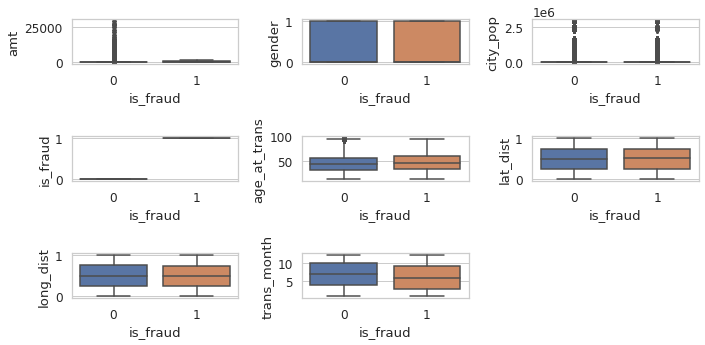

In [ ]:
plt.figure(figsize=[10,5])
i=1
for col in cols_num:
    plt.subplot(3,3,i)
    sns.boxplot(y=df_2[col],x=df_2["is_fraud"])
    plt.tight_layout()
    i=i+1

In [ ]:
x = cols_num.columns
x

Index(['amt', 'gender', 'city_pop', 'is_fraud', 'age_at_trans', 'lat_dist',
       'long_dist', 'trans_month'],
      dtype='object')

In [ ]:
cor_num = df_2[x].corr()
cor_num

,amt,gender,city_pop,is_fraud,age_at_trans,lat_dist,long_dist,trans_month
amt,1.000000,0.000740,0.004921,0.209308,-0.010735,0.000079,-0.000778,-0.002593
gender,0.000740,1.000000,-0.028862,0.005844,0.005904,0.000806,-0.000914,-0.000719
city_pop,0.004921,-0.028862,1.000000,0.000325,-0.092217,-0.000081,-0.000167,-0.000510
is_fraud,0.209308,0.005844,0.000325,1.000000,0.010635,0.000735,-0.000219,-0.016417
age_at_trans,-0.010735,0.005904,-0.092217,0.010635,1.000000,-0.001202,0.000511,0.016634
lat_dist,0.000079,0.000806,-0.000081,0.000735,-0.001202,1.000000,-0.000384,0.000444
long_dist,-0.000778,-0.000914,-0.000167,-0.000219,0.000511,-0.000384,1.000000,-0.000868
trans_month,-0.002593,-0.000719,-0.000510,-0.016417,0.016634,0.000444,-0.000868,1.000000


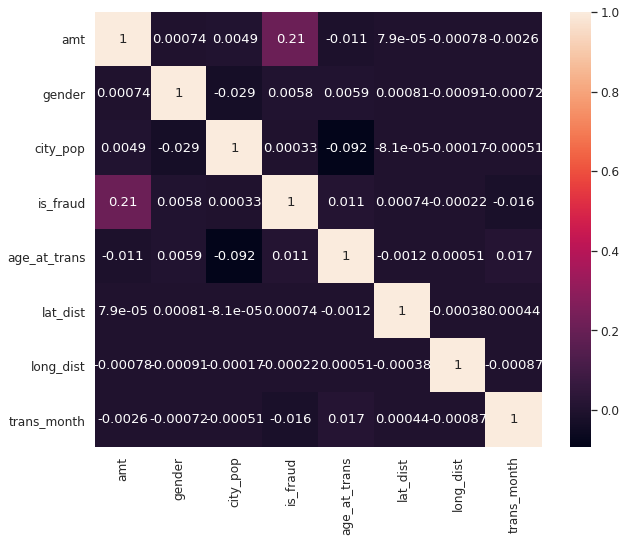

In [ ]:
plt.figure(figsize=[10,8])
sns.heatmap(cor_num,annot=True)
plt.show()

Amount and is_fraud is decently correlated

#### Creating Dummies for "Category" column

In [ ]:
df_3 = pd.get_dummies(df_2,columns=["category"],drop_first=True)

In [ ]:
df_3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1852394 entries, 0 to 1852393
Data columns (total 21 columns):
 #   Column                   Dtype  
---  ------                   -----  
 0   amt                      float64
 1   gender                   int64  
 2   city_pop                 int64  
 3   is_fraud                 int64  
 4   age_at_trans             float64
 5   lat_dist                 float64
 6   long_dist                float64
 7   trans_month              int64  
 8   category_food_dining     uint8  
 9   category_gas_transport   uint8  
 10  category_grocery_net     uint8  
 11  category_grocery_pos     uint8  
 12  category_health_fitness  uint8  
 13  category_home            uint8  
 14  category_kids_pets       uint8  
 15  category_misc_net        uint8  
 16  category_misc_pos        uint8  
 17  category_personal_care   uint8  
 18  category_shopping_net    uint8  
 19  category_shopping_pos    uint8  
 20  category_travel          uint8  
dtypes: float

#### Building Model

splitting train and test datasets into X and y

In [ ]:
X = df_3.drop(["is_fraud"],axis=1)
y = df_3["is_fraud"]

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=0.7,test_size=0.3,random_state=42)

In [ ]:
print(np.sum(y))
print(np.sum(y_train))
print(np.sum(y_test))

9651
6713
2938


### the model building model process will take bit more time please be tolerant


In [ ]:
#Create a dataframe to store results
df_Results = pd.DataFrame(columns=['Data_Imbalance_Handiling','Model','Accuracy','roc_value','threshold'])

In [ ]:
# Deifinig the code for conclusion matrix
def Plot_confusion_matrix(y_test, pred_test):
  cm = confusion_matrix(y_test, pred_test)
  plt.clf()
  plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Accent)
  classNames = ['Non-Fraudalent','Fraudalent']
  plt.title('Confusion Matrix - Test Data')
  plt.ylabel('True label')
  plt.xlabel('Predicted label')
  tick_marks = np.arange(len(classNames))
  plt.xticks(tick_marks, classNames, rotation=45)
  plt.yticks(tick_marks, classNames)
  s = [['TN','FP'], ['FN', 'TP']]
  
  for i in range(2):
      for j in range(2):
          plt.text(j,i, str(s[i][j])+" = "+str(cm[i][j]),fontsize=12)
  plt.show()

In [ ]:
import sklearn
from sklearn import metrics
from sklearn.metrics import roc_curve, auc 
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import average_precision_score, precision_recall_curve

In [ ]:
# Definig the code for building Logistic regression model


def buildAndRunLogisticModels(df_Results, DataImabalance, X_train,y_train, X_test, y_test ):

  # Logistic Regression
  
  from sklearn import linear_model #import the package
  from sklearn.model_selection import KFold

  num_C = list(np.power(10.0, np.arange(-10, 10)))
  cv_num = KFold(n_splits=10, shuffle=True, random_state=42)

  searchCV_l2 = linear_model.LogisticRegressionCV(Cs= num_C,penalty='l2',scoring='roc_auc',cv=cv_num,random_state=42,max_iter=10000,fit_intercept=True,solver='lbfgs',tol=0.0001)

  searchCV_l1 = linear_model.LogisticRegressionCV(Cs=num_C,penalty='l1',scoring='roc_auc',cv=cv_num,random_state=42,max_iter=10000,fit_intercept=True,solver='liblinear',tol=0.0001)

  #searchCV.fit(X_train, y_train)
  searchCV_l2.fit(X_train, y_train)
  searchCV_l1.fit(X_train, y_train)
  print ('Max auc_roc for l2:', searchCV_l2.scores_[1].mean(axis=0).max())
  print ('Max auc_roc for l1:', searchCV_l1.scores_[1].mean(axis=0).max())

  print("Parameters for l2 regularisations")
  print(searchCV_l2.coef_)
  print(searchCV_l2.intercept_) 
  print(searchCV_l2.scores_) 

  print("Parameters for l1 regularisations")
  print(searchCV_l1.coef_)
  print(searchCV_l1.intercept_) 
  print(searchCV_l1.scores_) 


  #find predicted vallues
  y_pred_l2 = searchCV_l2.predict(X_test)
  y_pred_l1 = searchCV_l1.predict(X_test)
  

  #Find predicted probabilities
  y_pred_probs_l2 = searchCV_l2.predict_proba(X_test)[:,1] 
  y_pred_probs_l1 = searchCV_l1.predict_proba(X_test)[:,1] 


 # Accuaracy of L2/L1 models
  Accuracy_l2 = metrics.accuracy_score(y_pred=y_pred_l2, y_true=y_test)
  Accuracy_l1 = metrics.accuracy_score(y_pred=y_pred_l1, y_true=y_test)

  print("Accuarcy of Logistic model with l2 regularisation : {0}".format(Accuracy_l2))
  print("Confusion Matrix")
  Plot_confusion_matrix(y_test, y_pred_l2)
  print("classification Report")
  print(classification_report(y_test, y_pred_l2))
  print("Accuarcy of Logistic model with l1 regularisation : {0}".format(Accuracy_l1))
  print("Confusion Matrix")
  Plot_confusion_matrix(y_test, y_pred_l1)
  print("classification Report")
  print(classification_report(y_test, y_pred_l1))

  from sklearn.metrics import roc_auc_score
  l2_roc_value = roc_auc_score(y_test, y_pred_probs_l2)
  print("l2 roc_value: {0}" .format(l2_roc_value))
  fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_probs_l2)
  threshold = thresholds[np.argmax(tpr-fpr)]
  print("l2 threshold: {0}".format(threshold))

  roc_auc = metrics.auc(fpr, tpr)
  print("ROC for the test dataset",'{:.1%}'.format(roc_auc))
  plt.plot(fpr,tpr,label="Test, auc="+str(roc_auc))
  plt.legend(loc=4)
  plt.show()
  
  df_Results = df_Results.append(pd.DataFrame({'Data_Imbalance_Handiling': DataImabalance,'Model': 'Logistic Regression with L2 Regularisation','Accuracy': Accuracy_l2,'roc_value': l2_roc_value,'threshold': threshold}, index=[0]),ignore_index= True)

  l1_roc_value = roc_auc_score(y_test, y_pred_probs_l1)
  print("l1 roc_value: {0}" .format(l1_roc_value))
  fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_probs_l1)
  threshold = thresholds[np.argmax(tpr-fpr)]
  print("l1 threshold: {0}".format(threshold))

  roc_auc = metrics.auc(fpr, tpr)
  print("ROC for the test dataset",'{:.1%}'.format(roc_auc))
  plt.plot(fpr,tpr,label="Test, auc="+str(roc_auc))
  plt.legend(loc=4)
  plt.show()
  
  df_Results = df_Results.append(pd.DataFrame({'Data_Imbalance_Handiling': DataImabalance,'Model': 'Logistic Regression with L1 Regularisation','Accuracy': Accuracy_l1,'roc_value': l1_roc_value,'threshold': threshold}, index=[0]),ignore_index= True)
  return df_Results

In [ ]:
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler, PowerTransformer

In [ ]:
# - Apply : preprocessing.PowerTransformer(copy=False) to fit & transform the train & test data
from sklearn.preprocessing import PolynomialFeatures, PowerTransformer
pt = PowerTransformer()
pt.fit(X_train)                       ## Fit the PT on training data
X_train_pt = pt.transform(X_train)    ## Then apply on all data
X_test_pt = pt.transform(X_test)

In [ ]:
cols = list(X.columns.values)

In [ ]:
cols

['amt',
 'gender',
 'city_pop',
 'age_at_trans',
 'lat_dist',
 'long_dist',
 'trans_month',
 'category_food_dining',
 'category_gas_transport',
 'category_grocery_net',
 'category_grocery_pos',
 'category_health_fitness',
 'category_home',
 'category_kids_pets',
 'category_misc_net',
 'category_misc_pos',
 'category_personal_care',
 'category_shopping_net',
 'category_shopping_pos',
 'category_travel']

In [ ]:
#Create Dataframe
X_train_pt_df = pd.DataFrame(data=X_train_pt,   columns=cols)
X_test_pt_df = pd.DataFrame(data=X_test_pt,   columns=cols)

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
import time

The below code will take more than 45 mins to get executed(in google collab), please be tolerated\

I have tried with multiple model to bring out the accuracy to its optimal level, regrettably my machine is out of scope to perform such huge dataset.\

That's why i have written the syntaxes but didn't executed them. so please think postive.

In [ ]:
#Run Logistic Regression with L1 And L2 Regularisation
print("Logistic Regression with L1 And L2 Regularisation")
start_time = time.time()
df_Results = buildAndRunLogisticModels(df_Results,"Power Transformer",X_train_pt_df,y_train, X_test_pt_df, y_test)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))

In [ ]:
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

In [ ]:
from sklearn.linear_model import Ridge, Lasso
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
def buildAndRunKNNModels(df_Results,DataImabalance, X_train,y_train, X_test, y_test ):

  #Evaluate KNN model 
  from sklearn.neighbors import KNeighborsClassifier 
  from sklearn.metrics import roc_auc_score

  #create KNN model and fit the model with train dataset 
  knn = KNeighborsClassifier(n_neighbors = 5,n_jobs=16)
  knn.fit(X_train,y_train) 
  score = knn.score(X_test,y_test) 
  print("model score") 
  print(score)

  #Accuracy 
  y_pred = knn.predict(X_test) 
  KNN_Accuracy = metrics.accuracy_score(y_pred=y_pred, y_true=y_test) 
  print("Confusion Matrix") 
  Plot_confusion_matrix(y_test, y_pred) 
  print("classification Report") 
  print(classification_report(y_test, y_pred))

  knn_probs = knn.predict_proba(X_test)[:, 1]

  #Calculate roc auc
  knn_roc_value = roc_auc_score(y_test, knn_probs) 
  print("KNN roc_value: {0}" .format(knn_roc_value))
  fpr, tpr, thresholds = metrics.roc_curve(y_test, knn_probs)
  threshold = thresholds[np.argmax(tpr-fpr)] 
  print("KNN threshold: {0}".format(threshold))

  roc_auc = metrics.auc(fpr, tpr) 
  print("ROC for the test dataset",'{:.1%}'.format(roc_auc)) 
  plt.plot(fpr,tpr,label="Test, auc="+str(roc_auc)) 
  plt.legend(loc=4) 
  plt.show()

  df_Results = df_Results.append(pd.DataFrame({'Data_Imbalance_Handiling': DataImabalance,'Model': 'KNN','Accuracy': score,'roc_value': knn_roc_value,'threshold': threshold}, index=[0]),ignore_index= True)

  return df_Results

The below codes is to build KNN model AND SVM model and to display them, unfortunately these are taking hours to execute. so i didn't involved in execution part. (the RAM in collab itself terminating the process of execution)

In [ ]:
#Run KNN Model
print("KNN Model")
#start_time = time.time()
#df_Results = buildAndRunKNNModels(df_Results,"Power Transformer",X_train_pt_df,y_train, X_test_pt_df, y_test)
#print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))

KNN Model


In [ ]:
def buildAndRunSVMModels(df_Results, DataImabalance, X_train,y_train, X_test, y_test ):
  #Evaluate SVM model with sigmoid kernel  model
  from sklearn.svm import SVC
  from sklearn.metrics import accuracy_score
  from sklearn.metrics import roc_auc_score

  clf = SVC(kernel='sigmoid', random_state=42)
  clf.fit(X_train,y_train)
  y_pred_SVM = clf.predict(X_test)
  SVM_Score = accuracy_score(y_test,y_pred_SVM)
  print("accuracy_score : {0}".format(SVM_Score))
  print("Confusion Matrix")
  Plot_confusion_matrix(y_test, y_pred_SVM)
  print("classification Report")
  print(classification_report(y_test, y_pred_SVM))



  # Run classifier
  classifier = SVC(kernel='sigmoid' , probability=True)
  svm_probs = classifier.fit(X_train, y_train).predict_proba(X_test)[:, 1]

  # Calculate roc auc
  roc_value = roc_auc_score(y_test, svm_probs)
  
  print("SVM roc_value: {0}" .format(roc_value))
  fpr, tpr, thresholds = metrics.roc_curve(y_test, svm_probs)
  threshold = thresholds[np.argmax(tpr-fpr)]
  print("SVM threshold: {0}".format(threshold))
  roc_auc = metrics.auc(fpr, tpr)
  print("ROC for the test dataset",'{:.1%}'.format(roc_auc))
  plt.plot(fpr,tpr,label="Test, auc="+str(roc_auc))
  plt.legend(loc=4)
  plt.show()
  
  df_Results = df_Results.append(pd.DataFrame({'Data_Imbalance_Handiling': DataImabalance,'Model': 'SVM','Accuracy': SVM_Score,'roc_value': roc_value,'threshold': threshold}, index=[0]),ignore_index= True)

  return df_Results

In [ ]:
def buildAndRunTreeModels(df_Results, DataImabalance, X_train,y_train, X_test, y_test ):
  #Evaluate Decision Tree model with 'gini' & 'entropy'
  from sklearn.tree import DecisionTreeClassifier
  from sklearn.metrics import roc_auc_score
  criteria = ['gini', 'entropy'] 
  scores = {} 
    
  for c in criteria: 
      dt = DecisionTreeClassifier(criterion = c, random_state=42) 
      dt.fit(X_train, y_train) 
      y_pred = dt.predict(X_test)
      test_score = dt.score(X_test, y_test) 
      tree_preds = dt.predict_proba(X_test)[:, 1]
      tree_roc_value = roc_auc_score(y_test, tree_preds)
      scores = test_score 
      print(c + " score: {0}" .format(test_score))
      print("Confusion Matrix")
      Plot_confusion_matrix(y_test, y_pred)
      print("classification Report")
      print(classification_report(y_test, y_pred))
      print(c + " tree_roc_value: {0}" .format(tree_roc_value))
      fpr, tpr, thresholds = metrics.roc_curve(y_test, tree_preds)
      threshold = thresholds[np.argmax(tpr-fpr)]
      print("Tree threshold: {0}".format(threshold))
      roc_auc = metrics.auc(fpr, tpr)
      print("ROC for the test dataset",'{:.1%}'.format(roc_auc))
      plt.plot(fpr,tpr,label="Test, auc="+str(roc_auc))
      plt.legend(loc=4)
      plt.show()
  
      df_Results = df_Results.append(pd.DataFrame({'Data_Imbalance_Handiling': DataImabalance,'Model': 'Tree Model with {0} criteria'.format(c),'Accuracy': test_score,'roc_value': tree_roc_value,'threshold': threshold}, index=[0]),ignore_index= True)

  return df_Results

Decision Tree Models with  'gini' & 'entropy' criteria
gini score: 0.996296689513945
Confusion Matrix


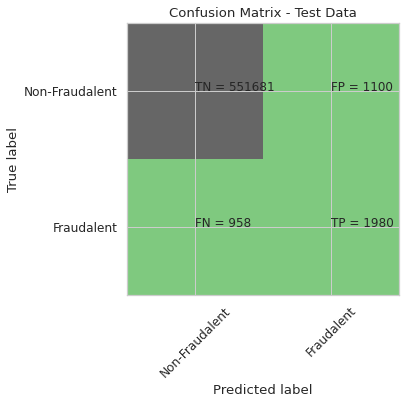

classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    552781
           1       0.64      0.67      0.66      2938

    accuracy                           1.00    555719
   macro avg       0.82      0.84      0.83    555719
weighted avg       1.00      1.00      1.00    555719

gini tree_roc_value: 0.8359689519601653
Tree threshold: 1.0
ROC for the test dataset 83.6%


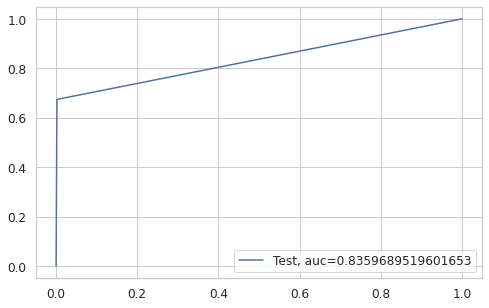

entropy score: 0.9964280508674348
Confusion Matrix


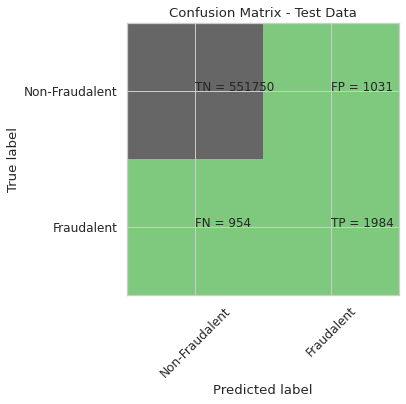

classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    552781
           1       0.66      0.68      0.67      2938

    accuracy                           1.00    555719
   macro avg       0.83      0.84      0.83    555719
weighted avg       1.00      1.00      1.00    555719

entropy tree_roc_value: 0.8367120988506696
Tree threshold: 1.0
ROC for the test dataset 83.7%


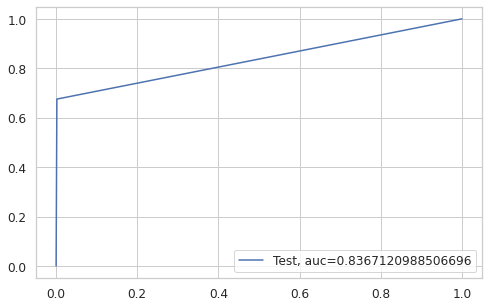

Time Taken by Model: --- 22.487234354019165 seconds ---


In [ ]:
#Run Decision Tree Models with  'gini' & 'entropy' criteria
print("Decision Tree Models with  'gini' & 'entropy' criteria")
start_time = time.time()
df_Results = buildAndRunTreeModels(df_Results,"Power Transformer",X_train_pt_df,y_train, X_test_pt_df, y_test)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))

In [ ]:
def buildAndRunRandomForestModels(df_Results, DataImabalance, X_train,y_train, X_test, y_test ):
  #Evaluate Random Forest model

  from sklearn.ensemble import RandomForestClassifier
  from sklearn.metrics import roc_auc_score

  # Create the model with 100 trees
  RF_model = RandomForestClassifier(n_estimators=100, 
                                bootstrap = True,
                                max_features = 'sqrt', random_state=42)
  # Fit on training data
  RF_model.fit(X_train, y_train)
  RF_test_score = RF_model.score(X_test, y_test)
  RF_model.predict(X_test)

  print('Model Accuracy: {0}'.format(RF_test_score))


  # Actual class predictions
  rf_predictions = RF_model.predict(X_test)

  print("Confusion Matrix")
  Plot_confusion_matrix(y_test, rf_predictions)
  print("classification Report")
  print(classification_report(y_test, rf_predictions))

  # Probabilities for each class
  rf_probs = RF_model.predict_proba(X_test)[:, 1]

  # Calculate roc auc
  roc_value = roc_auc_score(y_test, rf_probs)

  print("Random Forest roc_value: {0}" .format(roc_value))
  fpr, tpr, thresholds = metrics.roc_curve(y_test, rf_probs)
  threshold = thresholds[np.argmax(tpr-fpr)]
  print("Random Forest threshold: {0}".format(threshold))
  roc_auc = metrics.auc(fpr, tpr)
  print("ROC for the test dataset",'{:.1%}'.format(roc_auc))
  plt.plot(fpr,tpr,label="Test, auc="+str(roc_auc))
  plt.legend(loc=4)
  plt.show()
  
  df_Results = df_Results.append(pd.DataFrame({'Data_Imbalance_Handiling': DataImabalance,'Model': 'Random Forest','Accuracy': RF_test_score,'roc_value': roc_value,'threshold': threshold}, index=[0]),ignore_index= True)
  return df_Results

Random Forest Model
Model Accuracy: 0.9976390945783751
Confusion Matrix


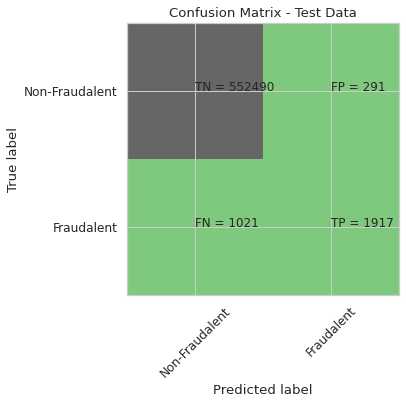

classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    552781
           1       0.87      0.65      0.75      2938

    accuracy                           1.00    555719
   macro avg       0.93      0.83      0.87    555719
weighted avg       1.00      1.00      1.00    555719

Random Forest roc_value: 0.9778997526424001
Random Forest threshold: 0.02
ROC for the test dataset 97.8%


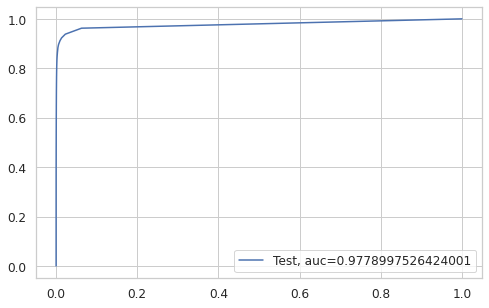

Time Taken by Model: --- 262.39019298553467 seconds ---


In [ ]:
#Run Random Forest Model
print("Random Forest Model")
start_time = time.time()
df_Results = buildAndRunRandomForestModels(df_Results,"Power Transformer",X_train_pt_df,y_train, X_test_pt_df, y_test)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))

In [ ]:
def buildAndRunXGBoostModels(df_Results, DataImabalance,X_train,y_train, X_test, y_test ):
  #Evaluate XGboost model
  from xgboost import XGBClassifier
  from sklearn.metrics import roc_auc_score
  # fit model no training data
  XGBmodel = XGBClassifier(random_state=42)
  XGBmodel.fit(X_train, y_train)
  y_pred = XGBmodel.predict(X_test)

  XGB_test_score = XGBmodel.score(X_test, y_test)
  print('Model Accuracy: {0}'.format(XGB_test_score))

  print("Confusion Matrix")
  Plot_confusion_matrix(y_test, y_pred)
  print("classification Report")
  print(classification_report(y_test, y_pred))
  # Probabilities for each class
  XGB_probs = XGBmodel.predict_proba(X_test)[:, 1]

  # Calculate roc auc
  XGB_roc_value = roc_auc_score(y_test, XGB_probs)

  print("XGboost roc_value: {0}" .format(XGB_roc_value))
  fpr, tpr, thresholds = metrics.roc_curve(y_test, XGB_probs)
  threshold = thresholds[np.argmax(tpr-fpr)]
  print("XGBoost threshold: {0}".format(threshold))
  roc_auc = metrics.auc(fpr, tpr)
  print("ROC for the test dataset",'{:.1%}'.format(roc_auc))
  plt.plot(fpr,tpr,label="Test, auc="+str(roc_auc))
  plt.legend(loc=4)
  plt.show()
  
  df_Results = df_Results.append(pd.DataFrame({'Data_Imbalance_Handiling': DataImabalance,'Model': 'XGBoost','Accuracy': XGB_test_score,'roc_value': XGB_roc_value,'threshold': threshold}, index=[0]),ignore_index= True)
  return df_Results

XGBoost Model
Model Accuracy: 0.9972702031062461
Confusion Matrix


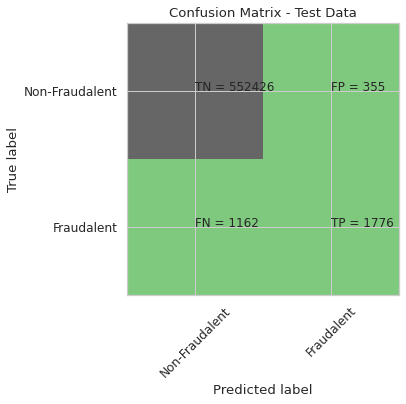

classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    552781
           1       0.83      0.60      0.70      2938

    accuracy                           1.00    555719
   macro avg       0.92      0.80      0.85    555719
weighted avg       1.00      1.00      1.00    555719

XGboost roc_value: 0.9843361262468484
XGBoost threshold: 0.005262591876089573
ROC for the test dataset 98.4%


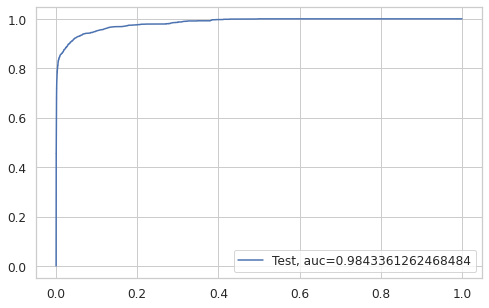

Time Taken by Model: --- 127.32342743873596 seconds ---


In [ ]:
#Run XGBoost Model
print("XGBoost Model")
start_time = time.time()
df_Results = buildAndRunXGBoostModels(df_Results,"Power Transformer",X_train_pt_df,y_train, X_test_pt_df, y_test)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))

### Performing the models with repeated KFold 

In [ ]:
#Lets perfrom RepeatedKFold and check the results
from sklearn.model_selection import RepeatedKFold
rkf = RepeatedKFold(n_splits=5, n_repeats=10, random_state=None)
# X is the feature set and y is the target
for train_index, test_index in rkf.split(X,y):
    print("TRAIN:", train_index, "TEST:", test_index)
    X_train_cv, X_test_cv = X.iloc[train_index], X.iloc[test_index]
    y_train_cv, y_test_cv = y.iloc[train_index], y.iloc[test_index]

TRAIN: [      0       2       3 ... 1852389 1852391 1852392] TEST: [      1       5       9 ... 1852388 1852390 1852393]
TRAIN: [      0       1       2 ... 1852390 1852392 1852393] TEST: [      6       7      13 ... 1852377 1852380 1852391]
TRAIN: [      1       2       3 ... 1852390 1852391 1852393] TEST: [      0       8      31 ... 1852382 1852385 1852392]
TRAIN: [      0       1       3 ... 1852391 1852392 1852393] TEST: [      2      12      17 ... 1852368 1852386 1852389]
TRAIN: [      0       1       2 ... 1852391 1852392 1852393] TEST: [      3       4      11 ... 1852370 1852375 1852381]
TRAIN: [      0       1       2 ... 1852389 1852390 1852393] TEST: [      5       7       8 ... 1852387 1852391 1852392]
TRAIN: [      2       3       4 ... 1852391 1852392 1852393] TEST: [      0       1      10 ... 1852383 1852385 1852389]
TRAIN: [      0       1       3 ... 1852391 1852392 1852393] TEST: [      2       4       9 ... 1852370 1852380 1852384]
TRAIN: [      0       1       2 

In [ ]:
#Run Logistic Regression with L1 And L2 Regularisation
print("Logistic Regression with L1 And L2 Regularisation")
start_time = time.time()
df_Results = buildAndRunLogisticModels(df_Results,"RepeatedKFold Cross Validation", X_train_cv,y_train_cv, X_test_cv, y_test_cv)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))

Decision Tree Models with  'gini' & 'entropy' criteria
gini score: 0.996410043241434
Confusion Matrix


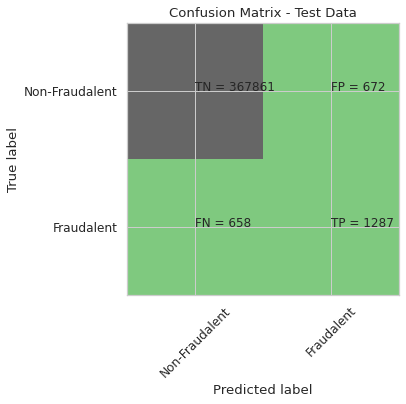

classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    368533
           1       0.66      0.66      0.66      1945

    accuracy                           1.00    370478
   macro avg       0.83      0.83      0.83    370478
weighted avg       1.00      1.00      1.00    370478

gini tree_roc_value: 0.8299366060823788
Tree threshold: 1.0
ROC for the test dataset 83.0%


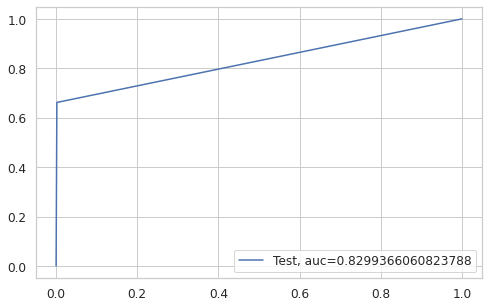

entropy score: 0.9965126134345359
Confusion Matrix


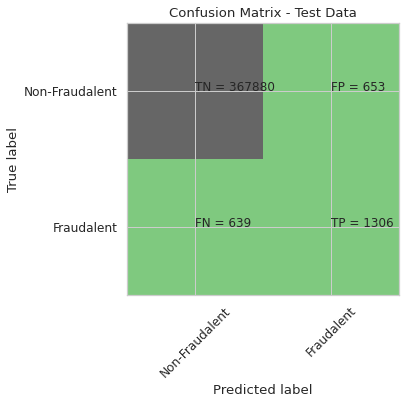

classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    368533
           1       0.67      0.67      0.67      1945

    accuracy                           1.00    370478
   macro avg       0.83      0.83      0.83    370478
weighted avg       1.00      1.00      1.00    370478

entropy tree_roc_value: 0.8348467027299381
Tree threshold: 1.0
ROC for the test dataset 83.5%


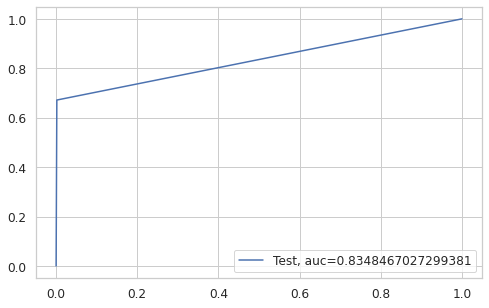

Time Taken by Model: --- 29.51809811592102 seconds ---


In [ ]:
#Run Decision Tree Models with  'gini' & 'entropy' criteria
print("Decision Tree Models with  'gini' & 'entropy' criteria")
start_time = time.time()
df_Results = buildAndRunTreeModels(df_Results,"RepeatedKFold Cross Validation",X_train_cv,y_train_cv, X_test_cv, y_test_cv)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))

Random Forest Model
Model Accuracy: 0.997573405168458
Confusion Matrix


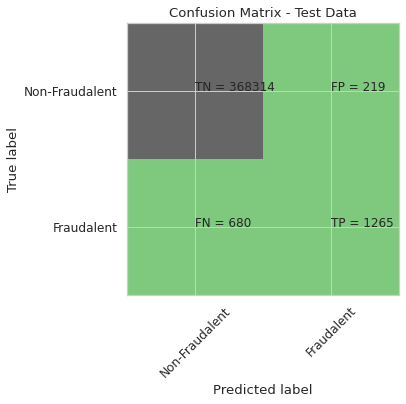

classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    368533
           1       0.85      0.65      0.74      1945

    accuracy                           1.00    370478
   macro avg       0.93      0.82      0.87    370478
weighted avg       1.00      1.00      1.00    370478

Random Forest roc_value: 0.9734743011541689
Random Forest threshold: 0.02
ROC for the test dataset 97.3%


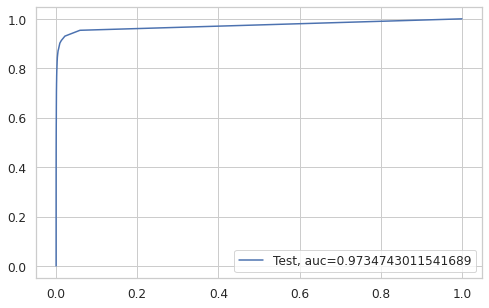

Time Taken by Model: --- 414.8001730442047 seconds ---


In [ ]:
#Run Random Forest Model
print("Random Forest Model")
start_time = time.time()
df_Results = buildAndRunRandomForestModels(df_Results,"RepeatedKFold Cross Validation",X_train_cv,y_train_cv, X_test_cv, y_test_cv)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))

XGBoost Model
Model Accuracy: 0.9972791906671921
Confusion Matrix


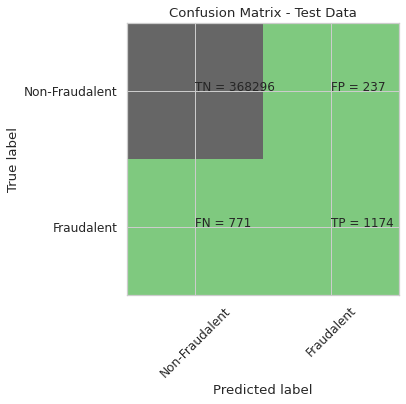

classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    368533
           1       0.83      0.60      0.70      1945

    accuracy                           1.00    370478
   macro avg       0.91      0.80      0.85    370478
weighted avg       1.00      1.00      1.00    370478

XGboost roc_value: 0.9834328809709828
XGBoost threshold: 0.006076560355722904
ROC for the test dataset 98.3%


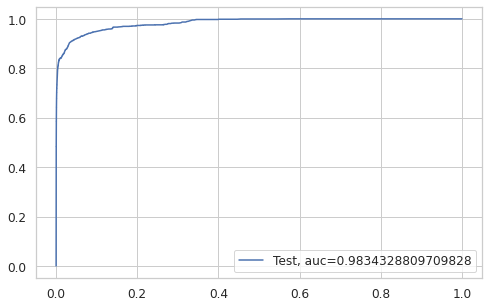

Time Taken by Model: --- 152.92437934875488 seconds ---


In [ ]:
#Run XGBoost Modela
print("XGBoost Model")
start_time = time.time()
df_Results = buildAndRunXGBoostModels(df_Results,"RepeatedKFold Cross Validation",X_train_cv,y_train_cv, X_test_cv, y_test_cv)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))

In [ ]:
df_Results

,Data_Imbalance_Handiling,Model,Accuracy,roc_value,threshold
0,Power Transformer,Tree Model with gini criteria,0.996297,0.835969,1.000000
1,Power Transformer,Tree Model with entropy criteria,0.996428,0.836712,1.000000
2,Power Transformer,Random Forest,0.997639,0.977900,0.020000
3,Power Transformer,XGBoost,0.997270,0.984336,0.005263
4,RepeatedKFold Cross Validation,Tree Model with gini criteria,0.996410,0.829937,1.000000
5,RepeatedKFold Cross Validation,Tree Model with entropy criteria,0.996513,0.834847,1.000000
6,RepeatedKFold Cross Validation,Random Forest,0.997573,0.973474,0.020000
7,RepeatedKFold Cross Validation,XGBoost,0.997279,0.983433,0.006077


In [ ]:

#Evaluate XGboost model
from xgboost import XGBClassifier
# fit model no training data
XGBmodel = XGBClassifier(random_state=42)
XGBmodel.fit(X_train_cv,y_train_cv)

coefficients = pd.concat([pd.DataFrame(X.columns),pd.DataFrame(np.transpose(XGBmodel.feature_importances_))], axis = 1)
coefficients.columns = ['Feature','feature_importances']

In [ ]:
coefficients

,Feature,feature_importances
0,amt,0.091195
1,gender,0.028005
2,city_pop,0.010654
3,age_at_trans,0.023001
4,lat_dist,0.000027
5,long_dist,0.000000
6,trans_month,0.016282
7,category_food_dining,0.015386
8,category_gas_transport,0.300781
9,category_grocery_net,0.049356


Repeated KFold has improved performance in all models, but the recall and precision of the models are not upto the mark, so lets check with stratified Kfold

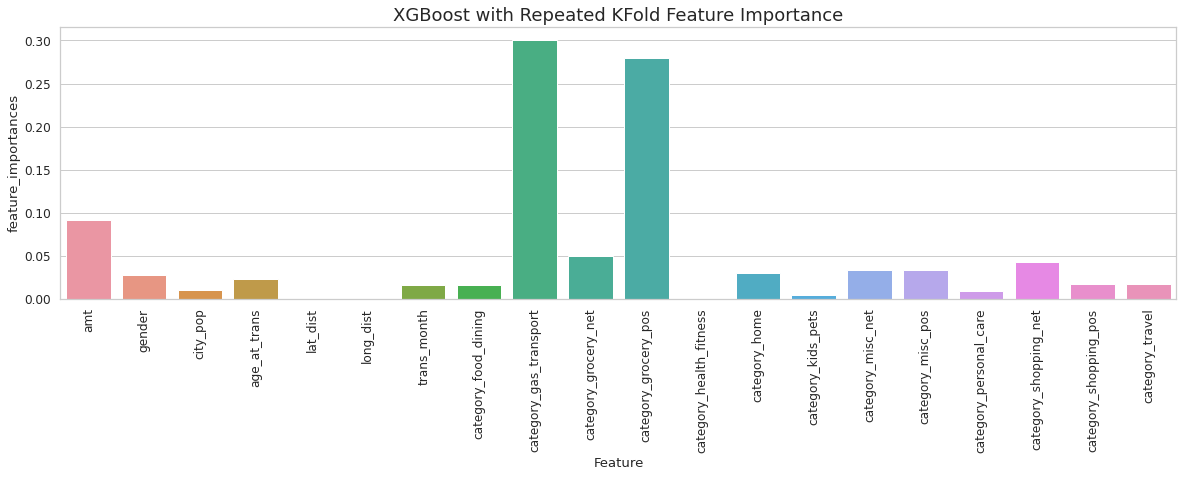

In [ ]:
plt.figure(figsize=(20,5))
sns.barplot(x='Feature', y='feature_importances', data=coefficients)
plt.title("XGBoost with Repeated KFold Feature Importance", fontsize=18)
plt.xticks(rotation = 'vertical')

plt.show()

### Performing the models with Stratified Kfold

In [ ]:
#Lets perfrom StratifiedKFold and check the results
from sklearn.model_selection import StratifiedKFold
skf = StratifiedKFold(n_splits=5, random_state=None)
# X is the feature set and y is the target
for train_index, test_index in skf.split(X,y):
    print("TRAIN:", train_index, "TEST:", test_index)
    X_train_SKF_cv, X_test_SKF_cv = X.iloc[train_index], X.iloc[test_index]
    y_train_SKF_cv, y_test_SKF_cv = y.iloc[train_index], y.iloc[test_index]

TRAIN: [ 246494  246500  246536 ... 1852391 1852392 1852393] TEST: [     0      1      2 ... 371049 371050 371051]
TRAIN: [      0       1       2 ... 1852391 1852392 1852393] TEST: [246494 246500 246536 ... 741476 741477 741478]
TRAIN: [      0       1       2 ... 1852391 1852392 1852393] TEST: [ 654499  654711  654827 ... 1112045 1112046 1112047]
TRAIN: [      0       1       2 ... 1852391 1852392 1852393] TEST: [1012123 1012304 1012660 ... 1482496 1482497 1482498]
TRAIN: [      0       1       2 ... 1482496 1482497 1482498] TEST: [1352137 1352672 1352944 ... 1852391 1852392 1852393]


The below code is taking hours to get executed so commented

In [ ]:
#Run Logistic Regression with L1 And L2 Regularisation
#print("Logistic Regression with L1 And L2 Regularisation")
#start_time = time.time()
#df_Results = buildAndRunLogisticModels(df_Results,"StratifiedKFold Cross Validation", X_train_SKF_cv,y_train_SKF_cv, X_test_SKF_cv, y_test_SKF_cv)
#print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))

Decision Tree Models with  'gini' & 'entropy' criteria
gini score: 0.9962264965800939
Confusion Matrix


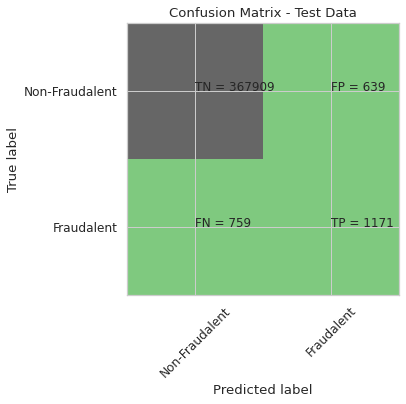

classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    368548
           1       0.65      0.61      0.63      1930

    accuracy                           1.00    370478
   macro avg       0.82      0.80      0.81    370478
weighted avg       1.00      1.00      1.00    370478

gini tree_roc_value: 0.8025009600762909
Tree threshold: 1.0
ROC for the test dataset 80.3%


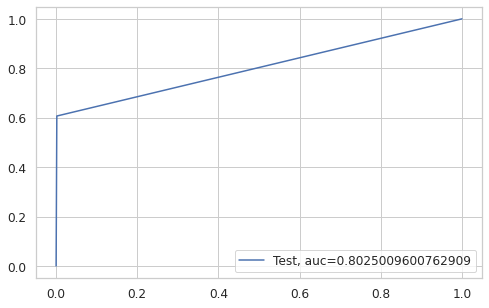

entropy score: 0.9962345942269176
Confusion Matrix


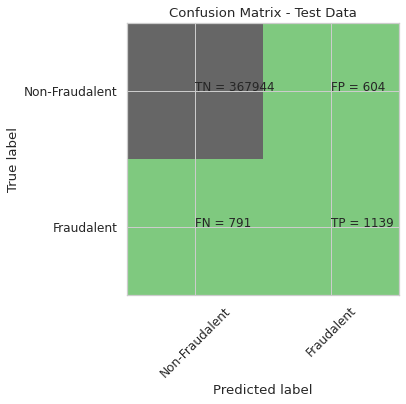

classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    368548
           1       0.65      0.59      0.62      1930

    accuracy                           1.00    370478
   macro avg       0.83      0.79      0.81    370478
weighted avg       1.00      1.00      1.00    370478

entropy tree_roc_value: 0.7942582882743714
Tree threshold: 1.0
ROC for the test dataset 79.4%


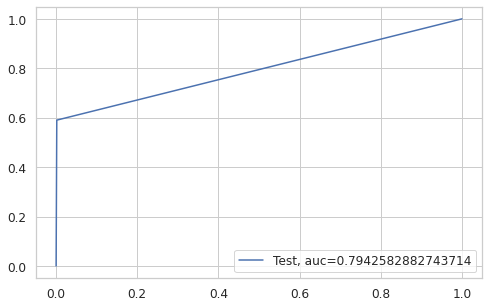

Time Taken by Model: --- 29.81089949607849 seconds ---


In [ ]:
#Run Decision Tree Models with  'gini' & 'entropy' criteria
print("Decision Tree Models with  'gini' & 'entropy' criteria")
start_time = time.time()
df_Results = buildAndRunTreeModels(df_Results,"StratifiedKFold Cross Validation",X_train_SKF_cv,y_train_SKF_cv, X_test_SKF_cv, y_test_SKF_cv)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))

Random Forest Model
Model Accuracy: 0.9974357451724529
Confusion Matrix


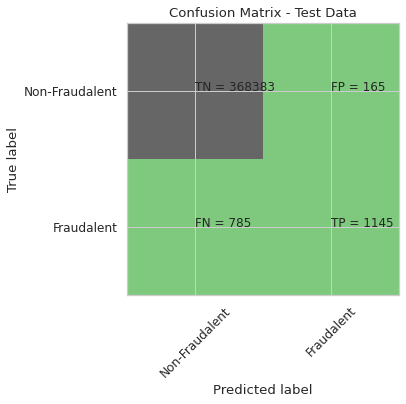

classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    368548
           1       0.87      0.59      0.71      1930

    accuracy                           1.00    370478
   macro avg       0.94      0.80      0.85    370478
weighted avg       1.00      1.00      1.00    370478

Random Forest roc_value: 0.9598981391249941
Random Forest threshold: 0.02
ROC for the test dataset 96.0%


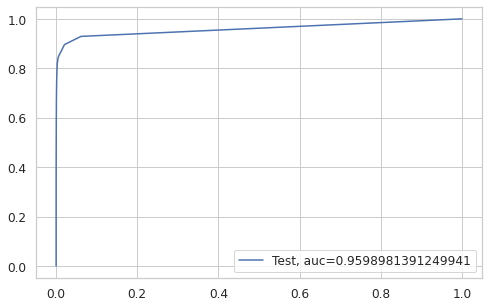

Time Taken by Model: --- 399.5815238952637 seconds ---


In [ ]:
#Run Random Forest Model
print("Random Forest Model")
start_time = time.time()
df_Results = buildAndRunRandomForestModels(df_Results,"StratifiedKFold Cross Validation",X_train_SKF_cv,y_train_SKF_cv, X_test_SKF_cv, y_test_SKF_cv)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))

XGBoost Model
Model Accuracy: 0.9970578549873407
Confusion Matrix


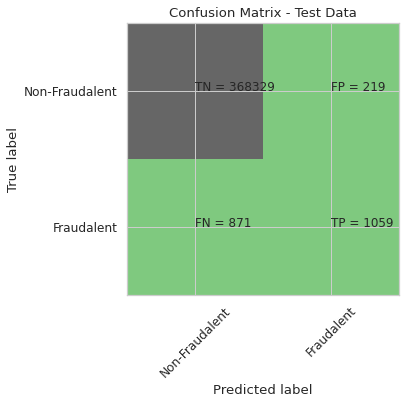

classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    368548
           1       0.83      0.55      0.66      1930

    accuracy                           1.00    370478
   macro avg       0.91      0.77      0.83    370478
weighted avg       1.00      1.00      1.00    370478

XGboost roc_value: 0.982586300300392
XGBoost threshold: 0.003874174552038312
ROC for the test dataset 98.3%


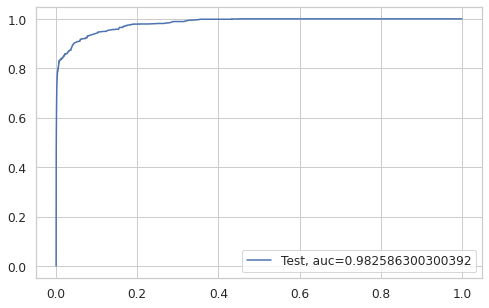

Time Taken by Model: --- 153.43974709510803 seconds ---


In [ ]:
#Run XGBoost Modela
print("XGBoost Model")
start_time = time.time()
df_Results = buildAndRunXGBoostModels(df_Results,"StratifiedKFold Cross Validation",X_train_SKF_cv,y_train_SKF_cv, X_test_SKF_cv, y_test_SKF_cv)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))

In [ ]:
df_Results

,Data_Imbalance_Handiling,Model,Accuracy,roc_value,threshold
0,Power Transformer,Tree Model with gini criteria,0.996297,0.835969,1.000000
1,Power Transformer,Tree Model with entropy criteria,0.996428,0.836712,1.000000
2,Power Transformer,Random Forest,0.997639,0.977900,0.020000
3,Power Transformer,XGBoost,0.997270,0.984336,0.005263
4,RepeatedKFold Cross Validation,Tree Model with gini criteria,0.996410,0.829937,1.000000
5,RepeatedKFold Cross Validation,Tree Model with entropy criteria,0.996513,0.834847,1.000000
6,RepeatedKFold Cross Validation,Random Forest,0.997573,0.973474,0.020000
7,RepeatedKFold Cross Validation,XGBoost,0.997279,0.983433,0.006077
8,StratifiedKFold Cross Validation,Tree Model with gini criteria,0.996226,0.802501,1.000000
9,StratifiedKFold Cross Validation,Tree Model with entropy criteria,0.996235,0.794258,1.000000


In [ ]:
# Logistic Regression
from sklearn import linear_model #import the package
from sklearn.model_selection import KFold

num_C = list(np.power(10.0, np.arange(-10, 10)))
cv_num = KFold(n_splits=10, shuffle=True, random_state=42)

searchCV_l2 = linear_model.LogisticRegressionCV(Cs= num_C,penalty='l2',scoring='roc_auc',cv=cv_num,random_state=42,max_iter=10000,fit_intercept=True,solver='lbfgs')

#searchCV.fit(X_train, y_train)
searchCV_l2.fit(X_train, y_train)
print ('Max auc_roc for l2:', searchCV_l2.scores_[1].mean(axis=0).max())


print("Parameters for l2 regularisations")
print(searchCV_l2.coef_)
print(searchCV_l2.intercept_) 
print(searchCV_l2.scores_) 


#find predicted vallues
y_pred_l2 = searchCV_l2.predict(X_test)


#Find predicted probabilities
y_pred_probs_l2 = searchCV_l2.predict_proba(X_test)[:,1] 


# Accuaracy of L2/L1 models
Accuracy_l2 = metrics.accuracy_score(y_pred=y_pred_l2, y_true=y_test)


print("Accuarcy of Logistic model with l2 regularisation : {0}".format(Accuracy_l2))


from sklearn.metrics import roc_auc_score
l2_roc_value = roc_auc_score(y_test, y_pred_probs_l2)
print("l2 roc_value: {0}" .format(l2_roc_value))
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_probs_l2)
threshold = thresholds[np.argmax(tpr-fpr)]
print("l2 threshold: {0}".format(threshold))

In [ ]:
coefficients = pd.concat([pd.DataFrame(X.columns),pd.DataFrame(np.transpose(searchCV_l2.coef_))], axis = 1)
coefficients.columns = ['Feature','Importance Coefficient']

NameError: ignored

In [ ]:
plt.figure(figsize=(20,5))
sns.barplot(x='Feature', y='Importance Coefficient', data=coefficients)
plt.title("Logistic Regression with L2 Regularisation Feature Importance", fontsize=18)
plt.xticks(rotation = 'vertical')
plt.show()


### As the models Oversampling data, take significantly longer time to run We will try with undersampling methods

In [ ]:
# Undersampling

from imblearn.under_sampling import RandomUnderSampler
#Define Oversampler
RUS = RandomUnderSampler(sampling_strategy=0.5)
# fit and apply the transform
X_Under, y_Under = RUS.fit_resample(X_train, y_train)
#Create Dataframe
X_Under = pd.DataFrame(data=X_Under,   columns=cols)

/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
print("Logistic Regression with L1 And L2 Regularisation")
start_time = time.time()
df_Results = buildAndRunLogisticModels(df_Results,"Random Undersampling", X_Under, y_Under , X_test, y_test)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))

Decision Tree Models with  'gini' & 'entropy' criteria
gini score: 0.9683940984562341
Confusion Matrix


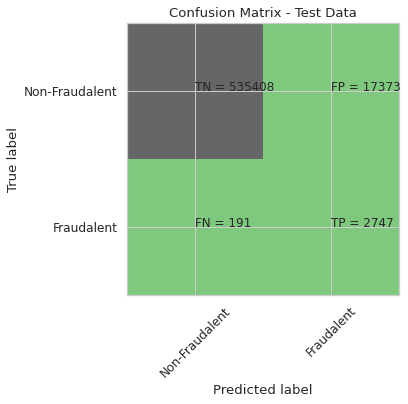

classification Report
              precision    recall  f1-score   support

           0       1.00      0.97      0.98    552781
           1       0.14      0.93      0.24      2938

    accuracy                           0.97    555719
   macro avg       0.57      0.95      0.61    555719
weighted avg       1.00      0.97      0.98    555719

gini tree_roc_value: 0.9517807147295049
Tree threshold: 1.0
ROC for the test dataset 95.2%


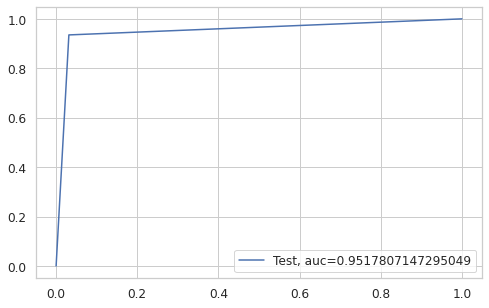

entropy score: 0.9684624783388727
Confusion Matrix


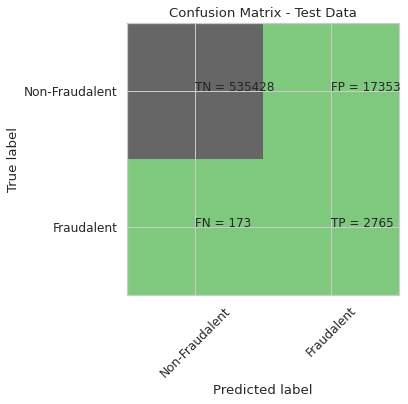

classification Report
              precision    recall  f1-score   support

           0       1.00      0.97      0.98    552781
           1       0.14      0.94      0.24      2938

    accuracy                           0.97    555719
   macro avg       0.57      0.95      0.61    555719
weighted avg       1.00      0.97      0.98    555719

entropy tree_roc_value: 0.9548621134493578
Tree threshold: 1.0
ROC for the test dataset 95.5%


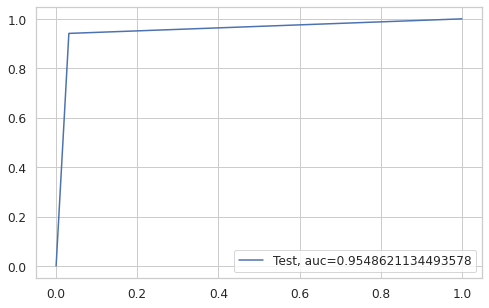

Time Taken by Model: --- 5.126752853393555 seconds ---


In [ ]:
#Run Decision Tree Models with  'gini' & 'entropy' criteria
print("Decision Tree Models with  'gini' & 'entropy' criteria")
start_time = time.time()
df_Results = buildAndRunTreeModels(df_Results, "Random Undersampling",X_Under, y_Under , X_test, y_test)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))

Random Forest Model
Model Accuracy: 0.9837525799909667
Confusion Matrix


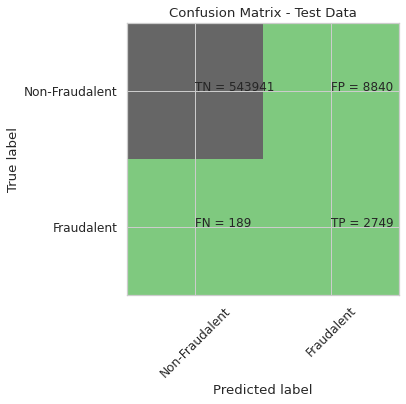

classification Report
              precision    recall  f1-score   support

           0       1.00      0.98      0.99    552781
           1       0.24      0.94      0.38      2938

    accuracy                           0.98    555719
   macro avg       0.62      0.96      0.69    555719
weighted avg       1.00      0.98      0.99    555719

Random Forest roc_value: 0.9950373828519662
Random Forest threshold: 0.32
ROC for the test dataset 99.5%


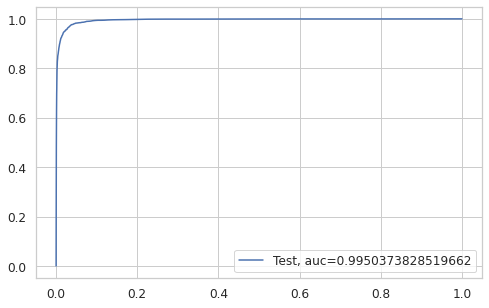

Time Taken by Model: --- 33.42206573486328 seconds ---


In [ ]:
#Run Random Forest Model
print("Random Forest Model")
start_time = time.time()
df_Results = buildAndRunRandomForestModels(df_Results, "Random Undersampling",X_Under, y_Under , X_test, y_test)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))

XGBoost Model
Model Accuracy: 0.9799395017985708
Confusion Matrix


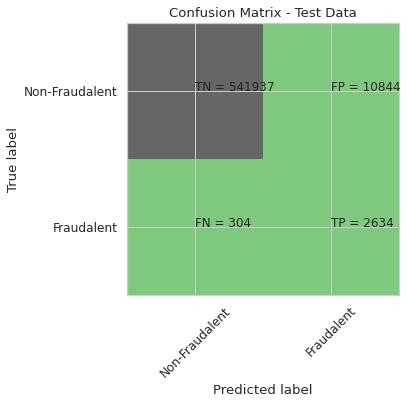

classification Report
              precision    recall  f1-score   support

           0       1.00      0.98      0.99    552781
           1       0.20      0.90      0.32      2938

    accuracy                           0.98    555719
   macro avg       0.60      0.94      0.66    555719
weighted avg       1.00      0.98      0.99    555719

XGboost roc_value: 0.9905374109301794
XGBoost threshold: 0.2938876152038574
ROC for the test dataset 99.1%


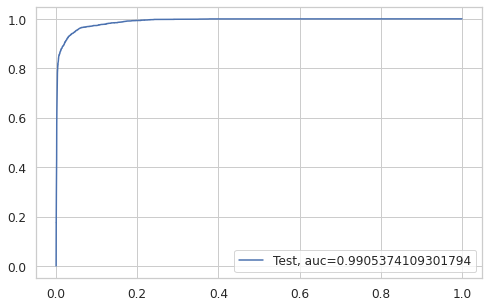

Time Taken by Model: --- 8.395586013793945 seconds ---


In [ ]:
#Run XGBoost Model
print("XGBoost Model")
start_time = time.time()
df_Results = buildAndRunXGBoostModels(df_Results, "Random Undersampling",X_Under, y_Under , X_test, y_test)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))

In [ ]:
df_Results

It seems Undersampling has impoved the random forest results, but the threshold value is more, which makes model unstable

### Oversampling with RandomOverSampler and StratifiedKFold Cross Validation
We will use Random Oversampling method to handle the class imbalance

First we will display class distibution with and without the Random Oversampling.

Once we have train and test dataset we will feed the data to below models:

Logistic Regression with L2 Regularisation\
Logistic Regression with L1 Regularisation\
Decision tree model with Gini criteria\
Decision tree model with Entropy criteria\
Random Forest\
XGBoost

In [ ]:
from sklearn.model_selection import StratifiedKFold
from imblearn.over_sampling import RandomOverSampler

#Define Oversampler
ROS = RandomOverSampler(sampling_strategy=0.5)
# fit and apply the transform
X_over, y_over = ROS.fit_resample(X_train, y_train)
  
#Create Dataframe for X_over
X_over = pd.DataFrame(data=X_over,   columns=cols)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
Data_Imbalance_Handiling	 = "Random Oversampling with StratifiedKFold CV "

In [ ]:

#Run Logistic Regression with L1 And L2 Regularisation
print("Logistic Regression with L1 And L2 Regularisation")
start_time = time.time()
#df_Results = buildAndRunLogisticModels(df_Results , Data_Imbalance_Handiling , X_over, y_over, X_test, y_test)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))

Decision Tree Models with  'gini' & 'entropy' criteria
gini score: 0.996541417514967
Confusion Matrix


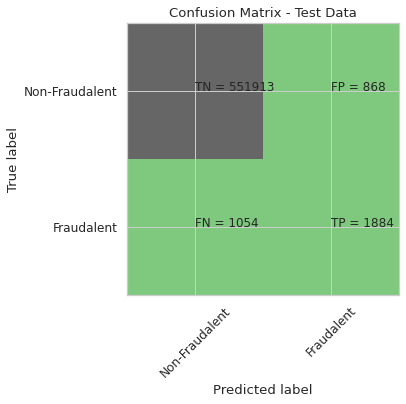

classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    552781
           1       0.68      0.64      0.66      2938

    accuracy                           1.00    555719
   macro avg       0.84      0.82      0.83    555719
weighted avg       1.00      1.00      1.00    555719

gini tree_roc_value: 0.8198411553269331
Tree threshold: 1.0
ROC for the test dataset 82.0%


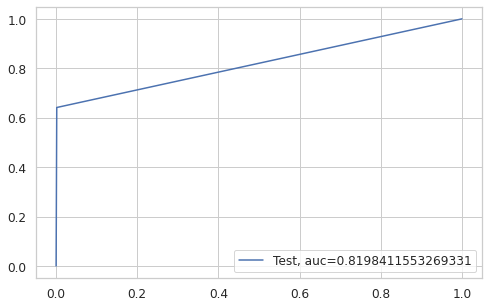

entropy score: 0.9966961719862016
Confusion Matrix


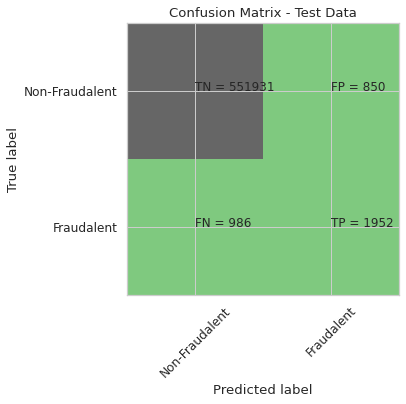

classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    552781
           1       0.70      0.66      0.68      2938

    accuracy                           1.00    555719
   macro avg       0.85      0.83      0.84    555719
weighted avg       1.00      1.00      1.00    555719

entropy tree_roc_value: 0.8314299349372242
Tree threshold: 1.0
ROC for the test dataset 83.1%


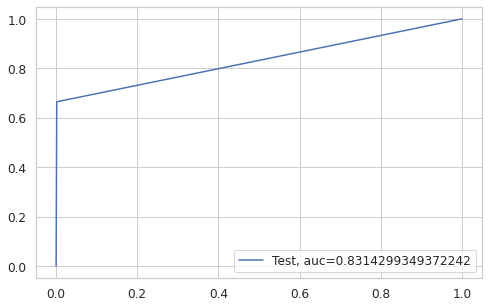

Time Taken by Model: --- 47.17256498336792 seconds ---


In [ ]:
#Run Decision Tree Models with  'gini' & 'entropy' criteria
print("Decision Tree Models with  'gini' & 'entropy' criteria")
start_time = time.time()
df_Results = buildAndRunTreeModels(df_Results , Data_Imbalance_Handiling,X_over, y_over, X_test, y_test)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))

Random Forest Model
Model Accuracy: 0.9977668569906734
Confusion Matrix


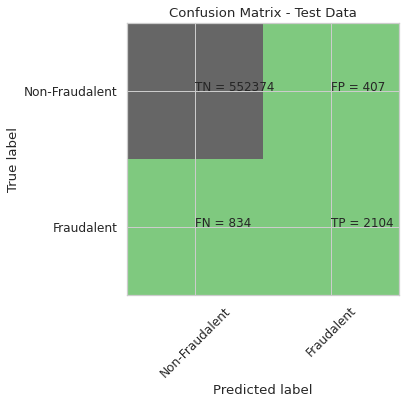

classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    552781
           1       0.84      0.72      0.77      2938

    accuracy                           1.00    555719
   macro avg       0.92      0.86      0.89    555719
weighted avg       1.00      1.00      1.00    555719

Random Forest roc_value: 0.9808438041908792
Random Forest threshold: 0.02
ROC for the test dataset 98.1%


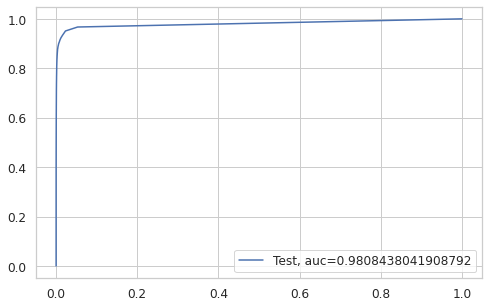

Time Taken by Model: --- 690.6790804862976 seconds ---


In [ ]:
#Run Random Forest Model
print("Random Forest Model")
start_time = time.time()
df_Results = buildAndRunRandomForestModels(df_Results , Data_Imbalance_Handiling,X_over, y_over, X_test, y_test)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))

XGBoost Model
Model Accuracy: 0.9830543853998154
Confusion Matrix


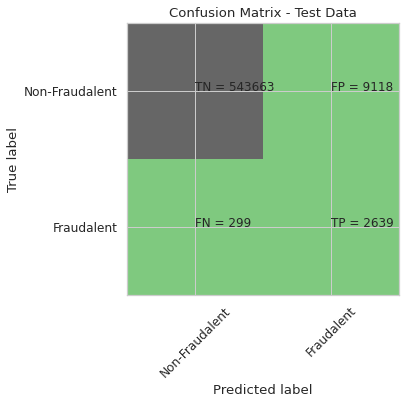

classification Report
              precision    recall  f1-score   support

           0       1.00      0.98      0.99    552781
           1       0.22      0.90      0.36      2938

    accuracy                           0.98    555719
   macro avg       0.61      0.94      0.68    555719
weighted avg       1.00      0.98      0.99    555719

XGboost roc_value: 0.9908442513512488
XGBoost threshold: 0.335051029920578
ROC for the test dataset 99.1%


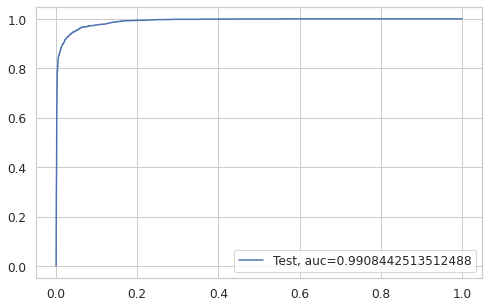

Time Taken by Model: --- 210.89135551452637 seconds ---


In [ ]:
#Run XGBoost Model
print("XGBoost Model")
start_time = time.time()
df_Results = buildAndRunXGBoostModels(df_Results , Data_Imbalance_Handiling,X_over, y_over, X_test, y_test)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))

In [ ]:
df_Results

Results for Random Oversampling;\
Random Oversampling seems to have positive change in prediction for XGBoost Looking at Accuracy and ROC value we have XGBoost which has provided best results for SMOTE oversampling technique.


### SMOTE Oversamplng
We will use SMOTE Oversampling method to handle the class imbalance

First we will display class distibution with and without the SMOTE Oversampling.

Then We will use the oversampled with StratifiedKFold cross validation method to genearte Train And test datasets.

In [ ]:
#Importing SMOTE
from imblearn.over_sampling import SMOTE
#Oversampling the data
smote = SMOTE(random_state = 101)
X_smote, y_smote = smote.fit_resample(X_train,y_train)

#Creating a new Oversampling Data Frame
df_oversampler = pd.DataFrame(X_smote,columns=cols)
df_oversampler["fraud"] = df_3.is_fraud

/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


NameError: ignored

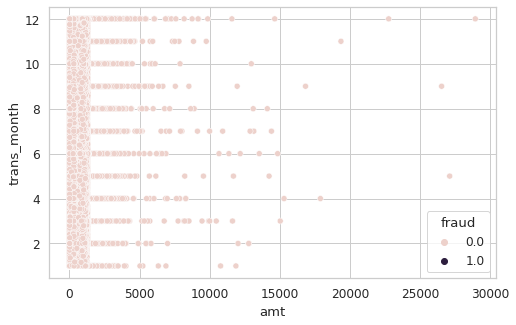

In [ ]:
sns.scatterplot(data = df_oversampler, x ='amt', y = 'trans_month', hue = 'fraud')

Random Forest Model
Model Accuracy: 0.9974033639303317
Confusion Matrix


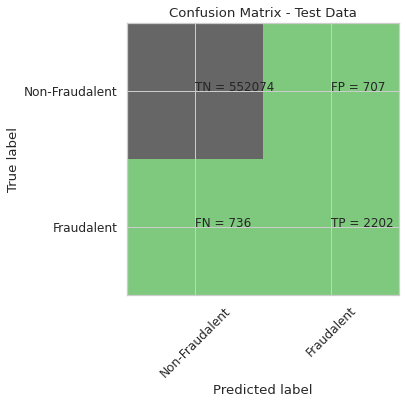

classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    552781
           1       0.76      0.75      0.75      2938

    accuracy                           1.00    555719
   macro avg       0.88      0.87      0.88    555719
weighted avg       1.00      1.00      1.00    555719

Random Forest roc_value: 0.9819644334447145
Random Forest threshold: 0.03
ROC for the test dataset 98.2%


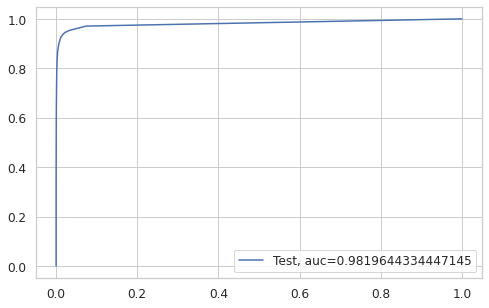

Time Taken by Model: --- 1074.4927473068237 seconds ---


In [ ]:
#Run Random Forest Model
print("Random Forest Model")
start_time = time.time()
df_Results = buildAndRunRandomForestModels(df_Results , Data_Imbalance_Handiling,X_smote, y_smote, X_test, y_test)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))

XGBoost Model
Model Accuracy: 0.990802905785118
Confusion Matrix


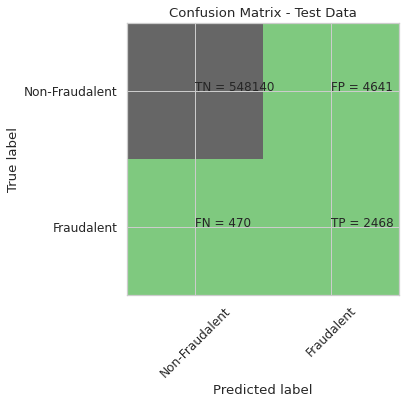

classification Report
              precision    recall  f1-score   support

           0       1.00      0.99      1.00    552781
           1       0.35      0.84      0.49      2938

    accuracy                           0.99    555719
   macro avg       0.67      0.92      0.74    555719
weighted avg       1.00      0.99      0.99    555719

XGboost roc_value: 0.982673494378149
XGBoost threshold: 0.20699360966682434
ROC for the test dataset 98.3%


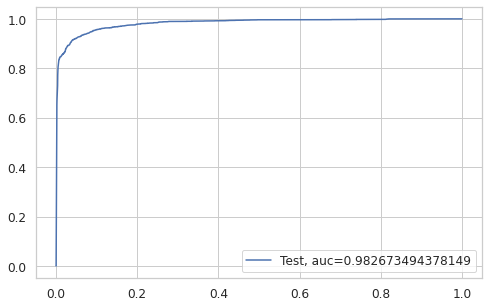

Time Taken by Model: --- 320.7542893886566 seconds ---


In [ ]:
#Run XGBoost Model
print("XGBoost Model")
start_time = time.time()
df_Results = buildAndRunXGBoostModels(df_Results , Data_Imbalance_Handiling,X_smote, y_smote, X_test.values, y_test.values)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))

### Results for SMOTE Oversampling:
Looking at Accuracy and ROC value we have XGBoost which has provided best results for SMOTE oversampling technique

### Oversampling with ADASYN Oversampling
We will use ADASYN Oversampling method to handle the class imbalance

First we will display class distibution with and without the ADASYN Oversampling.


In [ ]:

import warnings
warnings.filterwarnings("ignore")

from imblearn import over_sampling

ADASYN = over_sampling.ADASYN(random_state=0)
X_train_ADASYN, y_train_ADASYN = ADASYN.fit_sample(X_train, y_train) 

# Artificial minority samples and corresponding minority labels from ADASYN are appended
# below X_train and y_train respectively
# So to exclusively get the artificial minority samples from ADASYN, we do
X_train_adasyn_1 = X_train_ADASYN[X_train.shape[0]:]

X_train_1 = X_train.to_numpy()[np.where(y_train==1.0)]
X_train_0 = X_train.to_numpy()[np.where(y_train==0.0)]


import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = [20, 20]
fig = plt.figure()

plt.subplot(3, 1, 1)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.legend()

plt.subplot(3, 1, 2)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.scatter(X_train_adasyn_1[:X_train_1.shape[0], 0], X_train_adasyn_1[:X_train_1.shape[0], 1],
            label='Artificial ADASYN Class-1 Examples')
plt.legend()

plt.subplot(3, 1, 3)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.scatter(X_train_0[:X_train_1.shape[0], 0], X_train_0[:X_train_1.shape[0], 1], label='Actual Class-0 Examples')
plt.legend()

In [ ]:
df_Results

### Results for ADASYN Oversampling
Looking at Accuracy and ROC value we have XGBoost which has provided best results for ADASYN oversampling technique

### Overall conclusion after running models on Oversampled data
Looking at above results it seems XGBOOST model with StratifiedKFold CV has provided best results.

From starting Random forest is stable, with lower threshold and high accuracy.
looking at the results Random Oversampling with StratifiedKFold Cross Validation has been provided best results.  So we can try to tune the hyperparameters of this model to get best results.

Based on Processing speed, random forest model is optimal to evaluate and try with different hyperparameters

In [ ]:
# Using ADASYN to oversample

from imblearn.over_sampling import ADASYN
X_train_res, y_train_res = ADASYN().fit_resample(X_train, y_train)

from collections import Counter
print(sorted(Counter(y_train_res).items()))

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


[(0, 1289962), (1, 1290534)]


In [ ]:
#Creating a new Oversampling Data Frame
ada_oversampler = pd.DataFrame(X_smote,columns=cols)
ada_oversampler["fraud"] = df_3.is_fraud

Random Forest Model
Model Accuracy: 0.9973853692243742
Confusion Matrix


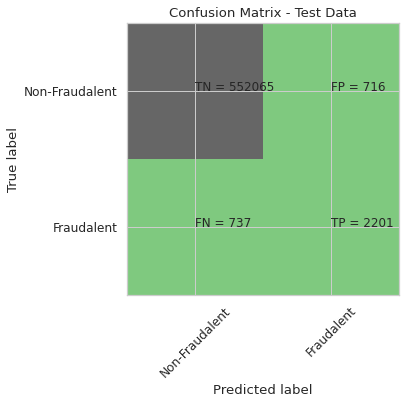

classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    552781
           1       0.75      0.75      0.75      2938

    accuracy                           1.00    555719
   macro avg       0.88      0.87      0.88    555719
weighted avg       1.00      1.00      1.00    555719

Random Forest roc_value: 0.9805381281280745
Random Forest threshold: 0.02
ROC for the test dataset 98.1%


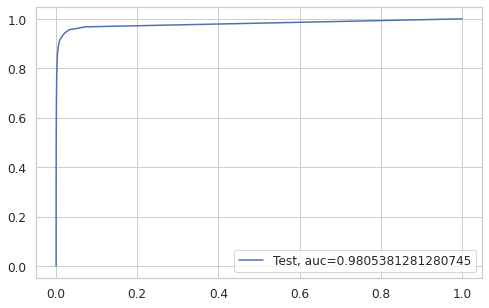

Time Taken by Model: --- 929.3031582832336 seconds ---


In [ ]:
#Run Random Forest Model
print("Random Forest Model")
start_time = time.time()
df_Results = buildAndRunRandomForestModels(df_Results , Data_Imbalance_Handiling,X_train_res, y_train_res, X_test, y_test)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))

XGBoost Model
Model Accuracy: 0.9855268579983769
Confusion Matrix


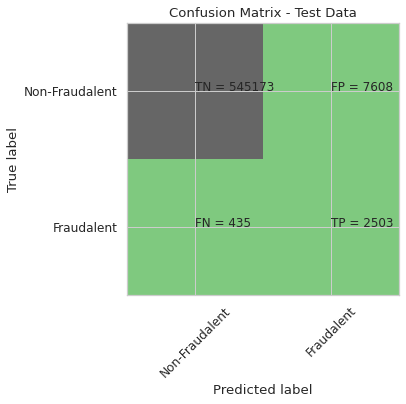

classification Report
              precision    recall  f1-score   support

           0       1.00      0.99      0.99    552781
           1       0.25      0.85      0.38      2938

    accuracy                           0.99    555719
   macro avg       0.62      0.92      0.69    555719
weighted avg       1.00      0.99      0.99    555719

XGboost roc_value: 0.9819918697523502
XGBoost threshold: 0.2433367520570755
ROC for the test dataset 98.2%


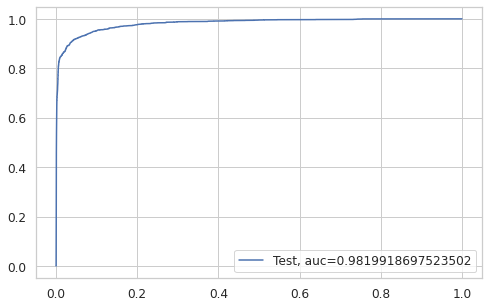

Time Taken by Model: --- 298.8757977485657 seconds ---


In [ ]:
#Run XGBoost Model
print("XGBoost Model")
start_time = time.time()
df_Results = buildAndRunXGBoostModels(df_Results , Data_Imbalance_Handiling,X_train_res, y_train_res, X_test.values, y_test.values)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))

Though, this dataset required oversampling or undersampling\
The XGBoost model with Stratified KFold has performed well and i chose the same to evaluate the model with multiple hyperparameters and continued with Cost benefit analysis

Model Accuracy: 0.9934553254432545


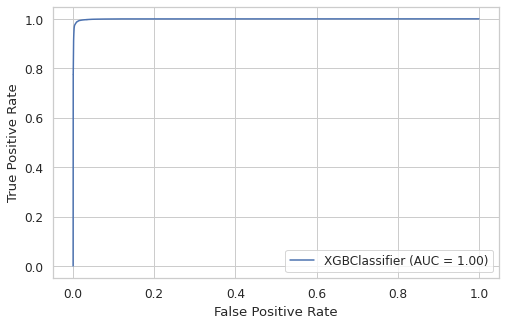

XGboost roc_value: 0.9913342106613793
XGBoost threshold: 0.19326162338256836


In [ ]:
#Evaluate XGboost model
from xgboost import XGBClassifier
# fit model no training data
XGBmodel = XGBClassifier(learning_rate =0.1,
 n_estimators=100,
 max_depth=5,
 min_child_weight=1,
 gamma=0,
 subsample=0.8,
 colsample_bytree=0.8,
 objective= 'binary:logistic',
 nthread=4,
 scale_pos_weight=1,
 seed=27)
XGBmodel.fit(X_train_res,y_train_res)

XGB_test_score = XGBmodel.score(X_test.values, y_test.values)
print('Model Accuracy: {0}'.format(XGB_test_score))

# Probabilities for each class
XGB_probs = XGBmodel.predict_proba(X_test.values)[:, 1]

# Calculate roc auc
from sklearn.metrics import roc_auc_score
XGB_roc_value = roc_auc_score(y_test.values, XGB_probs)
from sklearn.metrics import plot_roc_curve
plot_roc_curve(XGBmodel,X_train_res, y_train_res)
plt.show()

print("XGboost roc_value: {0}" .format(XGB_roc_value))
fpr, tpr, thresholds = metrics.roc_curve(y_test.values, XGB_probs)
threshold = thresholds[np.argmax(tpr-fpr)]
print("XGBoost threshold: {0}".format(threshold))

### Evaluate the Random Forest model

Model Accuracy: RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=5, max_features=12,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=100, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=True, random_state=42, verbose=0,
                       warm_start=False)


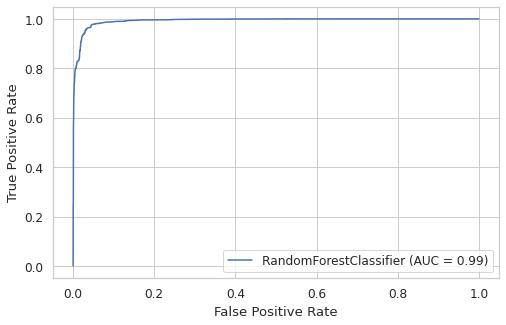

RFmodel roc_value: 0.9810158595213465
RFmodel threshold: 0.24467039139207775


In [ ]:
#Evaluate RF model
from sklearn.ensemble import RandomForestClassifier

# fit model no training data
RFmodel = RandomForestClassifier(n_estimators=100, max_depth=5, max_features=12, min_samples_leaf=100, random_state=42, oob_score=True)
RFmodel.fit(X_train_res, y_train_res)

RF_test_score = RFmodel.score(X_test, y_test)
print('Model Accuracy: {0}'.format(RFmodel))


# Probabilities for each class
RF_probs = RFmodel.predict_proba(X_test)[:, 1]

# Calculate roc auc
from sklearn.metrics import roc_auc_score
RF_roc_value = roc_auc_score(y_test, RF_probs)
from sklearn.metrics import plot_roc_curve
plot_roc_curve(RFmodel,X_train_res, y_train_res)
plt.show()

print("RFmodel roc_value: {0}" .format(RF_roc_value))
fpr, tpr, thresholds = metrics.roc_curve(y_test, RF_probs)
threshold = thresholds[np.argmax(tpr-fpr)]
print("RFmodel threshold: {0}".format(threshold))

In [ ]:
y_pred_RF = RFmodel.predict(X_train_res)
y_pred[:20]

array([0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_train_res, y_pred_RF))

              precision    recall  f1-score   support

           0       0.91      0.98      0.95   1289962
           1       0.98      0.91      0.94   1290534

    accuracy                           0.94   2580496
   macro avg       0.95      0.94      0.94   2580496
weighted avg       0.95      0.94      0.94   2580496



In [ ]:
RFmodel.oob_score_

0.941204326610078

Evaluating the model-hyperparameters with the different params, the processing time for this dataset is out of the scope for my machine.(taking hours for execution)

evaluating the XG Boost model giving the best score

In [ ]:
imp_df = pd.DataFrame({
    "Varname": X_train.columns,
    "Imp": XGBmodel.feature_importances_
})

In [ ]:
imp_df.sort_values(by="Imp", ascending=False)

,Varname,Imp
0,amt,0.678391
8,category_gas_transport,0.129484
10,category_grocery_pos,0.045703
16,category_personal_care,0.031481
13,category_kids_pets,0.030238
1,gender,0.014417
15,category_misc_pos,0.013258
6,trans_month,0.013096
17,category_shopping_net,0.012859
7,category_food_dining,0.009733


In [ ]:
y_pred = XGBmodel.predict(X_train_res)
y_pred[:10]

array([0, 0, 0, 0, 0, 0, 1, 0, 0, 0])

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_train_res, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99   1289962
           1       0.99      0.98      0.99   1290534

    accuracy                           0.99   2580496
   macro avg       0.99      0.99      0.99   2580496
weighted avg       0.99      0.99      0.99   2580496



In [ ]:
df_merge = df[['trans_date_trans_time','amt','trans_num','is_fraud']]
df_merge.head()

,trans_date_trans_time,amt,trans_num,is_fraud
0,2019-01-01 00:00:18,4.97,0b242abb623afc578575680df30655b9,0
1,2019-01-01 00:00:44,107.23,1f76529f8574734946361c461b024d99,0
2,2019-01-01 00:00:51,220.11,a1a22d70485983eac12b5b88dad1cf95,0
3,2019-01-01 00:01:16,45.00,6b849c168bdad6f867558c3793159a81,0
4,2019-01-01 00:03:06,41.96,a41d7549acf90789359a9aa5346dcb46,0


In [ ]:
df_pred = pd.DataFrame(y_pred)
df_pred.head()

,0
0,0
1,0
2,0
3,0
4,0


In [ ]:
# Merging the two dataframes

df_final = pd.concat([df_merge, df_pred],axis=1)
df_final.head(20)

,trans_date_trans_time,amt,trans_num,is_fraud,0
0,2019-01-01 00:00:18,4.97,0b242abb623afc578575680df30655b9,0.0,0
1,2019-01-01 00:00:44,107.23,1f76529f8574734946361c461b024d99,0.0,0
2,2019-01-01 00:00:51,220.11,a1a22d70485983eac12b5b88dad1cf95,0.0,0
3,2019-01-01 00:01:16,45.00,6b849c168bdad6f867558c3793159a81,0.0,0
4,2019-01-01 00:03:06,41.96,a41d7549acf90789359a9aa5346dcb46,0.0,0
5,2019-01-01 00:04:08,94.63,189a841a0a8ba03058526bcfe566aab5,0.0,0
6,2019-01-01 00:04:42,44.54,83ec1cc84142af6e2acf10c44949e720,0.0,1
7,2019-01-01 00:05:08,71.65,6d294ed2cc447d2c71c7171a3d54967c,0.0,0
8,2019-01-01 00:05:18,4.27,fc28024ce480f8ef21a32d64c93a29f5,0.0,0
9,2019-01-01 00:06:01,198.39,3b9014ea8fb80bd65de0b1463b00b00e,0.0,0


In [ ]:
# Renaming column

df_final= df_final.rename(columns={ 0 : 'is_fraud_pred'})
df_final.head()

,trans_date_trans_time,amt,trans_num,is_fraud,is_fraud_pred
0,2019-01-01 00:00:18,4.97,0b242abb623afc578575680df30655b9,0.0,0
1,2019-01-01 00:00:44,107.23,1f76529f8574734946361c461b024d99,0.0,0
2,2019-01-01 00:00:51,220.11,a1a22d70485983eac12b5b88dad1cf95,0.0,0
3,2019-01-01 00:01:16,45.00,6b849c168bdad6f867558c3793159a81,0.0,0
4,2019-01-01 00:03:06,41.96,a41d7549acf90789359a9aa5346dcb46,0.0,0


### Cost Benefit Analysis

In [ ]:
# Creating month and year columns

df_final['month'] = pd.DatetimeIndex(df_final['trans_date_trans_time']).month
df_final['year'] = pd.DatetimeIndex(df_final['trans_date_trans_time']).year

In [ ]:
df_final.tail()

,trans_date_trans_time,amt,trans_num,is_fraud,is_fraud_pred,month,year
2580491,NaT,NaN,NaN,NaN,1,NaN,NaN
2580492,NaT,NaN,NaN,NaN,1,NaN,NaN
2580493,NaT,NaN,NaN,NaN,1,NaN,NaN
2580494,NaT,NaN,NaN,NaN,1,NaN,NaN
2580495,NaT,NaN,NaN,NaN,1,NaN,NaN


In [ ]:
df_final.shape

(2580496, 7)

In [ ]:
# Group by variable creation

grp = df_final.groupby(["year","month"])

In [ ]:
# Number of transactions per month

grp.trans_num.count()

year    month
2019.0  1.0       52525
        2.0       49866
        3.0       70939
        4.0       68078
        5.0       72532
        6.0       86064
        7.0       86596
        8.0       87359
        9.0       70652
        10.0      68758
        11.0      70421
        12.0     141060
2020.0  1.0       52202
        2.0       47791
        3.0       72850
        4.0       66892
        5.0       74343
        6.0       87805
        7.0       85848
        8.0       88759
        9.0       69533
        10.0      69348
        11.0      72635
        12.0     139538
Name: trans_num, dtype: int64

In [ ]:
# (a) Average number of transactions per month

df_final.trans_num.count()/24

77183.08333333333

In [ ]:
# (b) Average Number of fraudulent transactions per month

df_final[df_final['is_fraud']==1].trans_num.count()/24

402.125

In [ ]:
# (c) Average amount per fraud transaction

df_final[df_final['is_fraud']==1].amt.mean()

530.6614122888789

In [ ]:
# Cost incurred per month before the model was deployed (b*c)
402.125*530.6614122888789

213392.22041666543

In [ ]:
# number of transactions per month detected as fraud by the model

df_final[df_final['is_fraud_pred']==1].trans_num.count()

559005

In [ ]:
# (2) Average number of transactions per month detected as fraud by the model(TF)
df_final[df_final['is_fraud_pred']==1].trans_num.count()/24

23291.875

In [ ]:
# Average number of transactions per month that are fraudulent but are not detected by the model

Undetected_frauds = df_final.loc[(df_final.is_fraud_pred==0) & (df_final.is_fraud==1)]
Undetected_frauds.head(20)

,trans_date_trans_time,amt,trans_num,is_fraud,is_fraud_pred,month,year
2472,2019-01-02 01:47:29,11.52,bc7d41c41103877b03232f03f1f8d3f5,1.0,0,1.0,2019.0
2523,2019-01-02 03:05:23,276.31,b98f12f4168391b2203238813df5aa8c,1.0,0,1.0,2019.0
2546,2019-01-02 03:38:03,7.03,397894a5c4c02e3c61c784001f0f14e4,1.0,0,1.0,2019.0
2553,2019-01-02 03:55:47,275.73,7863235a750d73a244c07f1fb7f0185a,1.0,0,1.0,2019.0
2937,2019-01-02 13:38:08,844.80,248c2746e78f2ec713df51254ff1b302,1.0,0,1.0,2019.0
3527,2019-01-02 23:52:08,843.91,2f7d497f607396ab669c14c2abe3886f,1.0,0,1.0,2019.0
3580,2019-01-03 01:05:27,10.76,0a2f8002e55a3565c5c88d8cf039fed8,1.0,0,1.0,2019.0
3600,2019-01-03 01:35:52,332.35,97903213a2fd7e53bbaa60807144a505,1.0,0,1.0,2019.0
3671,2019-01-03 03:17:36,315.34,0ffc2b7dae4c33883f14ac60283d4027,1.0,0,1.0,2019.0
4324,2019-01-03 16:54:53,337.05,7301679c460c5f2a464b0ecb5c610b47,1.0,0,1.0,2019.0


In [143]:
Undetected_frauds.shape

(7460, 7)

In [151]:
# number of transactions per month that are fraudulent but are not detected by the model
print("Undeteced Transactions:",Undetected_frauds.trans_num.count())
print("undected percentage:",(Undetected_frauds.trans_num.count())/(df_final.trans_num.count())*100)

Undeteced Transactions: 7460
undected percentage: 0.40272209907827383


In [ ]:
# (5) Average number of transactions per month that are fraudulent but are not detected by the model (FN)
Undetected_frauds.trans_num.count()/24

310.8333333333333

In [ ]:
# (1) Cost incurred per month before the model was deployed (b*c)

(df_final[df_final['is_fraud']==1].trans_num.count()/24) * (df_final[df_final['is_fraud']==1].amt.mean())

213392.22041666543

In [ ]:
# (4) Total cost of providing customer support per month for fraudulent transactions detected by the model (TF*$1.5)
(df_final[df_final['is_fraud_pred']==1].trans_num.count()/24)*1.5

34937.8125

In [ ]:
# (6) Cost incurred due to fraudulent transactions left undetected by the model (FN*c)
(Undetected_frauds.trans_num.count()/24) * (df_final[df_final['is_fraud']==1].amt.mean())

164947.2556531265

In [ ]:
# (7) Cost incurred per month after the model is built and deployed (4+6)

(df_final[df_final['is_fraud_pred']==1].trans_num.count()/24)*1.5 + (Undetected_frauds.trans_num.count()/24) * (df_final[df_final['is_fraud']==1].amt.mean())

199885.0681531265

In [ ]:
# (8) Final savings (1-7)
#Final savings = Cost incurred before - Cost incurred after(1-7)

213392.22041666543 - 199885.0681531265

13507.152263538912

### Summary

Since this data present in the dataset is highly biased, there could be minor chance of incorrect fraud prediction for some transactions. Because, the data is getting oversampled to balance the samples to build the models.\
-- Fortunately our model has achieved accuracy of around 99%\
-- I have Listed out the particular transactions like category, merchants who inccur the fraud has plotted in visualization segment and important insights are taken down for presentation.\
-- Cost benifit analysis has calculated as per the questions asked in the excel sheet.

### Conclusion

XG Boost model with perfect hyperparameters  is the best model for the data has out performed to predict the fraud transactions\
-- accuracy 99% on train dataset and 98% on test dataset\
-- The ROC_curve has given AUC of 99%
We also noticed by looking at the results of Logistic Regression with L2 Regularisation with RepeatedKFold Cross Validation has been provided best results without any oversampling.